<a href="https://colab.research.google.com/github/kumarraviranjan845/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing and Observing the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Global_Terrorism_Data.csv', encoding="latin1")

In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# **Cleaning the Dataset**

**Keeping only Relevant Columns**

In [4]:
terrorism = df[['iyear', 'country_txt', 'region_txt', 'provstate', 'city', 'location',
                'success', 'suicide', 'claimed', 'attacktype1_txt', 'targtype1_txt', 'gname',
                'motive', 'weaptype1_txt', 'nkill', 'nwound']]

**Renaming the columns**

In [ ]:
terrorism.rename(columns={'iyear': 'year', 'country_txt': 'country', 'region_txt': 'region', 'provstate': 'province/state',
                          'attacktype1_txt': 'attack_type', 'targtype1_txt': 'target_type', 'gname': 'terrorist_group',
                          'weaptype1_txt': 'weapon_type', 'nkill': 'killed', 'nwound': 'wounded'}, inplace=True)

In [ ]:
terrorism.head()

,year,country,region,province/state,city,location,success,suicide,claimed,attack_type,target_type,terrorist_group,motive,weapon_type,killed,wounded
0,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,1,0,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,Mexico,North America,Federal,Mexico city,NaN,1,0,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,Unknown,NaN,1,0,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Attica,Athens,NaN,1,0,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,Fukouka,NaN,1,0,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [ ]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             181691 non-null  int64  
 1   country          181691 non-null  object 
 2   region           181691 non-null  object 
 3   province/state   181270 non-null  object 
 4   city             181257 non-null  object 
 5   location         55495 non-null   object 
 6   success          181691 non-null  int64  
 7   suicide          181691 non-null  int64  
 8   claimed          115571 non-null  float64
 9   attack_type      181691 non-null  object 
 10  target_type      181691 non-null  object 
 11  terrorist_group  181691 non-null  object 
 12  motive           50561 non-null   object 
 13  weapon_type      181691 non-null  object 
 14  killed           171378 non-null  float64
 15  wounded          165380 non-null  float64
dtypes: float64(3), int64(3), object(10)
me

In [ ]:
terrorism.shape

(181691, 16)

In [ ]:
terrorism['killed'] = terrorism['killed'].fillna(0)
terrorism['wounded'] = terrorism['wounded'].fillna(0)

In [ ]:
terrorism['casualties'] = terrorism['killed'] + terrorism['wounded']

# **Analysing the Dataset**

In [ ]:
terrorism.describe()

,year,success,suicide,claimed,killed,wounded,casualties
count,181691.000000,181691.000000,181691.000000,115571.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,0.889598,0.036507,0.049666,2.266860,2.883296,5.150156
std,13.259430,0.313391,0.187549,1.093195,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000
25%,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,9574.000000


## **Overview**

1. **The data is given for the terrorist attacks occured from year 1970 till 2017.**
2. **The maximum number of casualties in an single attack is 9574.**
3. **The maximum number of people killed in an single attack is 1570.**
4. **The maximum number of people injured in an single attack is 8191.**

---



## **Year wise Attacks and Damages**

1. **Year wise Attacks**

In [8]:
attacks = terrorism["year"].value_counts().reset_index().rename(columns={"index":"year","year":"number_of_attacks"}).set_index('year').sort_index()
success = terrorism[['year', 'success']].groupby('year').sum()
year_attacks = pd.concat([attacks, success], axis=1)
year_attacks['unsuccess'] = year_attacks['number_of_attacks']-year_attacks['success']
year_attacks.head()

,number_of_attacks,success,unsuccess
year,,,
1970,651,549,102
1971,471,420,51
1972,568,452,116
1973,473,433,40
1974,581,545,36


Text(0, 0.5, 'Total Number of Attacks')

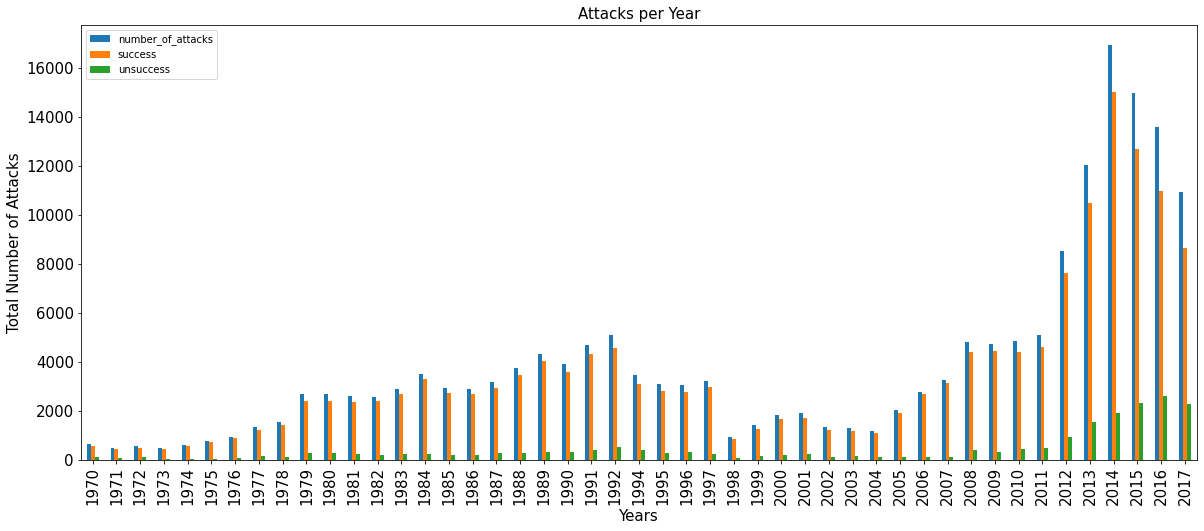

In [ ]:
year_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Attacks per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

In [ ]:
print('The Year with maximum number of attacks:')
year_attacks.loc[year_attacks['number_of_attacks'] == year_attacks['number_of_attacks'].max()]

The Year with maximum number of attacks:


,number_of_attacks,success,unsuccess
year,,,
2014,16903,15015,1888


In [ ]:
print('The Year with minimum number of attacks:')
year_attacks.loc[year_attacks['number_of_attacks'] == year_attacks['number_of_attacks'].min()]

The Year with minimum number of attacks:


,number_of_attacks,success,unsuccess
year,,,
1971,471,420,51


2. **Year wise Killed**

In [ ]:
year_killed = terrorism[['year', 'killed']].groupby('year').sum()
year_killed.head()

,killed
year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Text(0, 0.5, 'Number of People Killed')

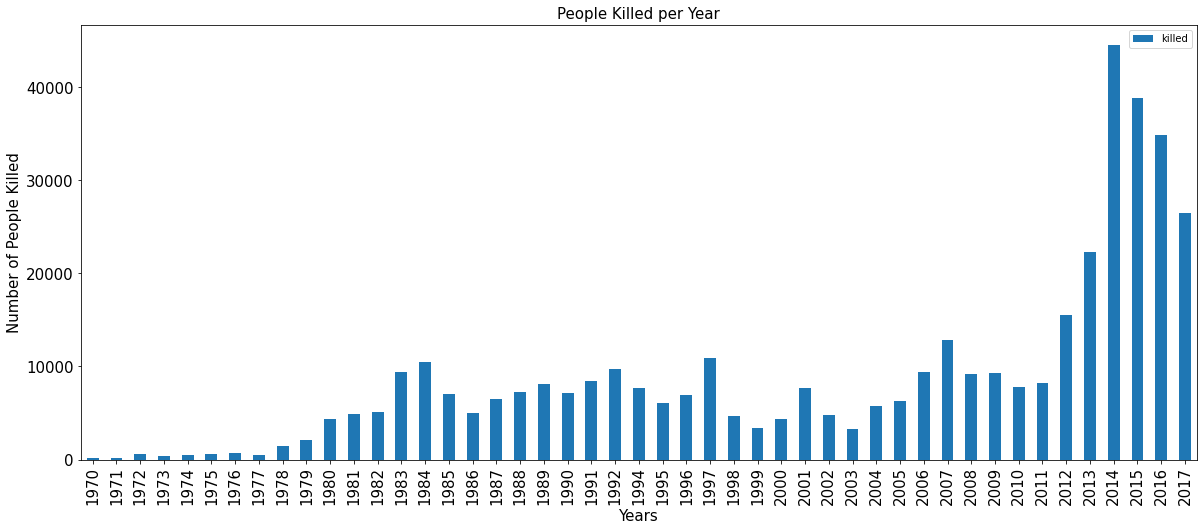

In [ ]:
year_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Killed per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

In [ ]:
print('The Year with maximum number of people killed:')
year_killed.loc[year_killed['killed'] == year_killed['killed'].max()]

The Year with maximum number of people killed:


,killed
year,
2014,44490.0


In [ ]:
print('The Year with minimum number of people killed:')
year_killed.loc[year_killed['killed'] == year_killed['killed'].min()]

The Year with minimum number of people killed:


,killed
year,
1971,173.0


3. **Year wise Injured**

In [ ]:
year_injured = terrorism[['year', 'wounded']].groupby('year').sum()
year_injured.head()

,wounded
year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Injured')

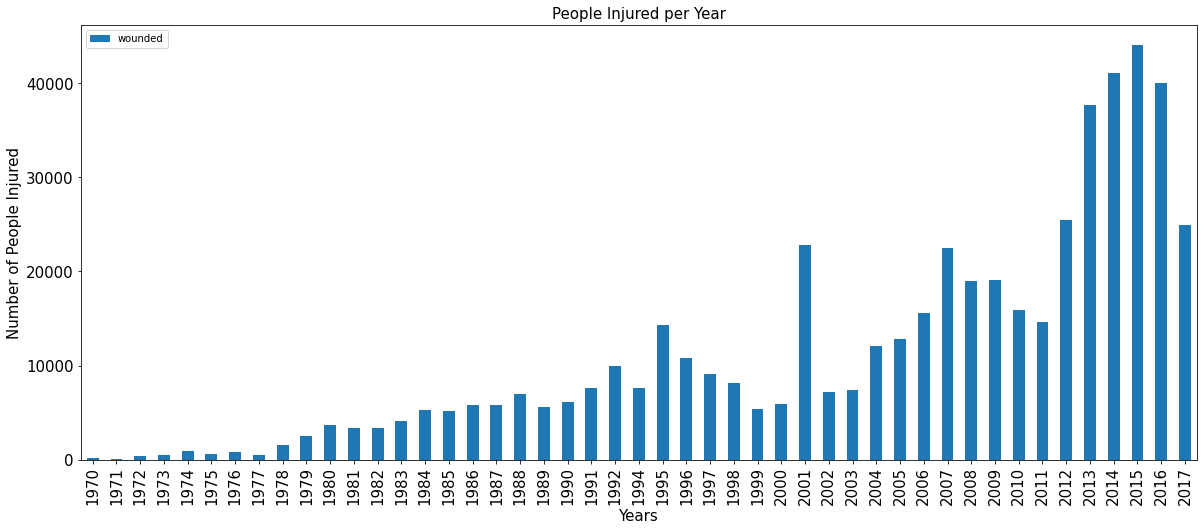

In [ ]:
year_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Injured per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

In [ ]:
print('The Year with maximum number of people injured:')
year_injured.loc[year_injured['wounded'] == year_injured['wounded'].max()]

The Year with maximum number of people injured:


,wounded
year,
2015,44043.0


In [ ]:
print('The Year with minimum number of people injured:')
year_injured.loc[year_injured['wounded'] == year_injured['wounded'].min()]

The Year with minimum number of people injured:


,wounded
year,
1971,82.0


3. **year wise total casualties**

In [ ]:
year_casualty = terrorism[['year', 'casualties']].groupby('year').sum()
year_casualty.head()

,casualties
year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


Text(0, 0.5, 'Number of Total Casualties')

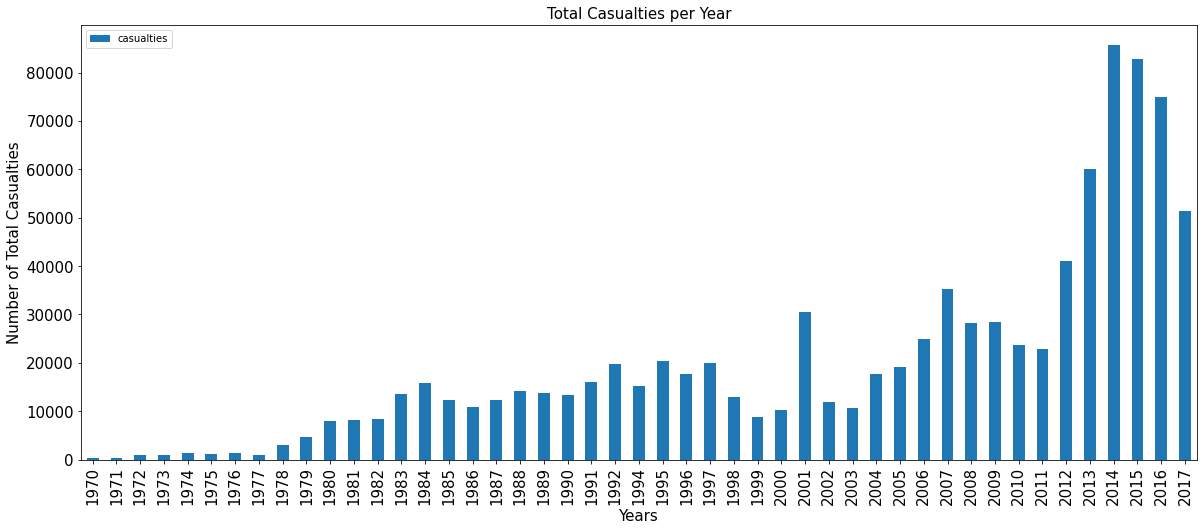

In [ ]:
year_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Total Casualties per Year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

In [ ]:
print('The Year with maximum number of casualties:')
year_casualty.loc[year_casualty['casualties'] == year_casualty['casualties'].max()]

The Year with maximum number of casualties:


,casualties
year,
2014,85618.0


In [ ]:
print('The Year with minimum number of casualties:')
year_casualty.loc[year_casualty['casualties'] == year_casualty['casualties'].min()]

The Year with minimum number of casualties:


,casualties
year,
1971,255.0


## **Country wise Attacks and Damages**

1. **Country wise Attacks**

In [ ]:
country_attacks = terrorism["country"].value_counts().reset_index().rename(columns={"index":"country", "country":"number_of_attacks"}).set_index('country')
country_attacks.sort_values('number_of_attacks', ascending=False)
top_country_attacks = country_attacks.head(10)
top_country_attacks

,number_of_attacks
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


Text(0, 0.5, 'Total Number of Attacks')

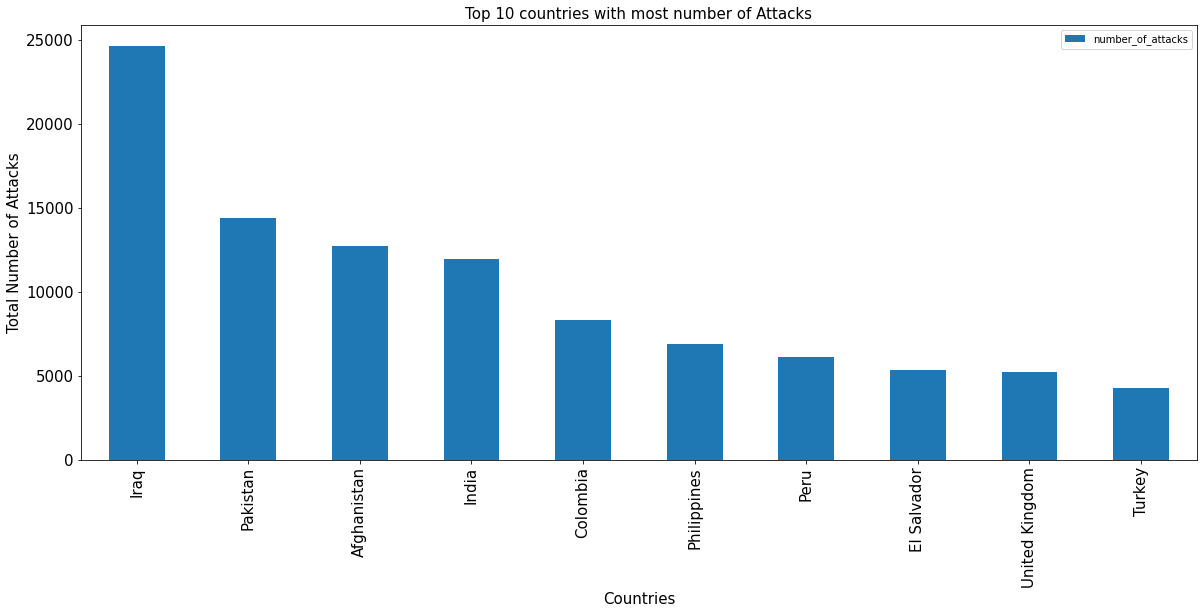

In [ ]:
top_country_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 countries with most number of Attacks", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

In [ ]:
print('The Countries with minimum number of attacks:')
country_attacks.loc[country_attacks['number_of_attacks'] == country_attacks['number_of_attacks'].min()]

The Country with minimum number of attacks:


,number_of_attacks
country,
Wallis and Futuna,1
St. Lucia,1
Falkland Islands,1
Andorra,1
Antigua and Barbuda,1
South Vietnam,1
New Hebrides,1
North Korea,1
Vatican City,1


2. **Country wise Killed**

In [ ]:
country_killed = terrorism[['country', 'killed']].groupby('country').sum().sort_values('killed', ascending=False)
top_country_killed = country_killed.head(10)
top_country_killed

,killed
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


Text(0, 0.5, 'Number of People Killed')

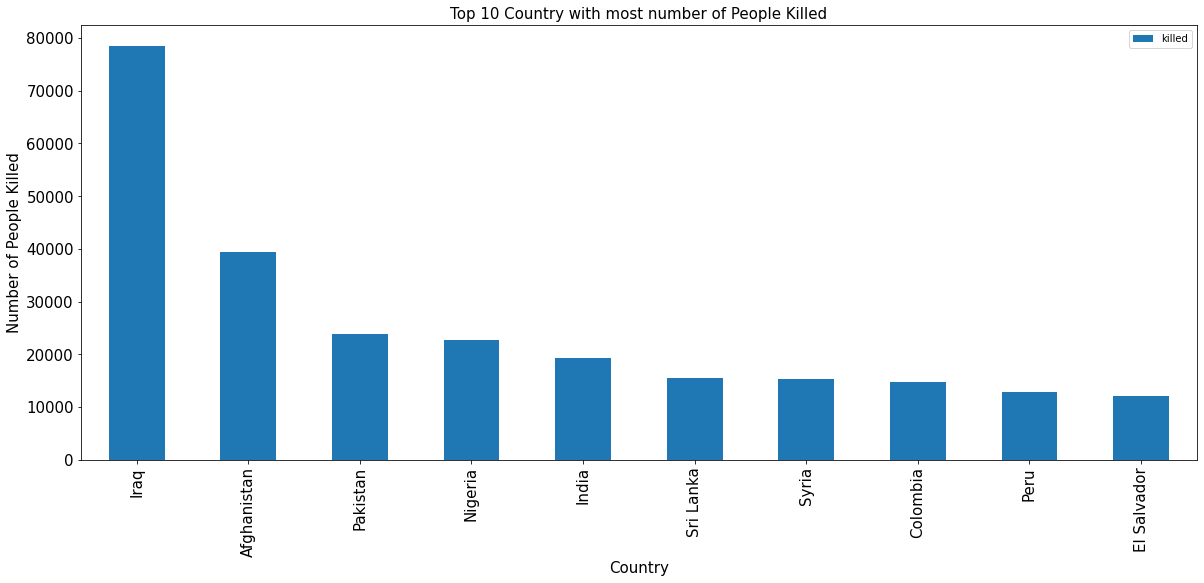

In [ ]:
top_country_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 Country with most number of People Killed", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

3. **Country wise Injured**

In [ ]:
country_injured = terrorism[['country', 'wounded']].groupby('country').sum().sort_values('wounded', ascending=False)
top_country_injured = country_injured.head(10)
top_country_injured

,wounded
country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


Text(0, 0.5, 'Number of People Injured')

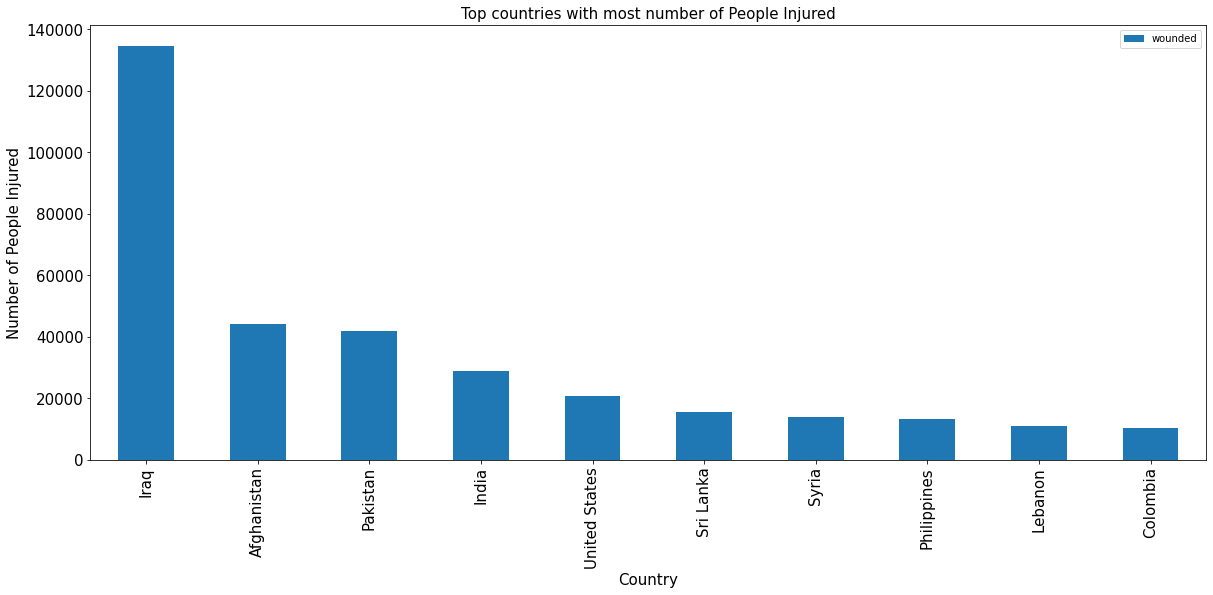

In [ ]:
top_country_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top countries with most number of People Injured", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

3. **Country wise total casualties**

In [ ]:
country_casualty = terrorism[['country', 'casualties']].groupby('country').sum().sort_values('casualties', ascending=False)
top_country_casualty = country_casualty.head(10)
top_country_casualty

,casualties
country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


Text(0, 0.5, 'Number of Total Casualties')

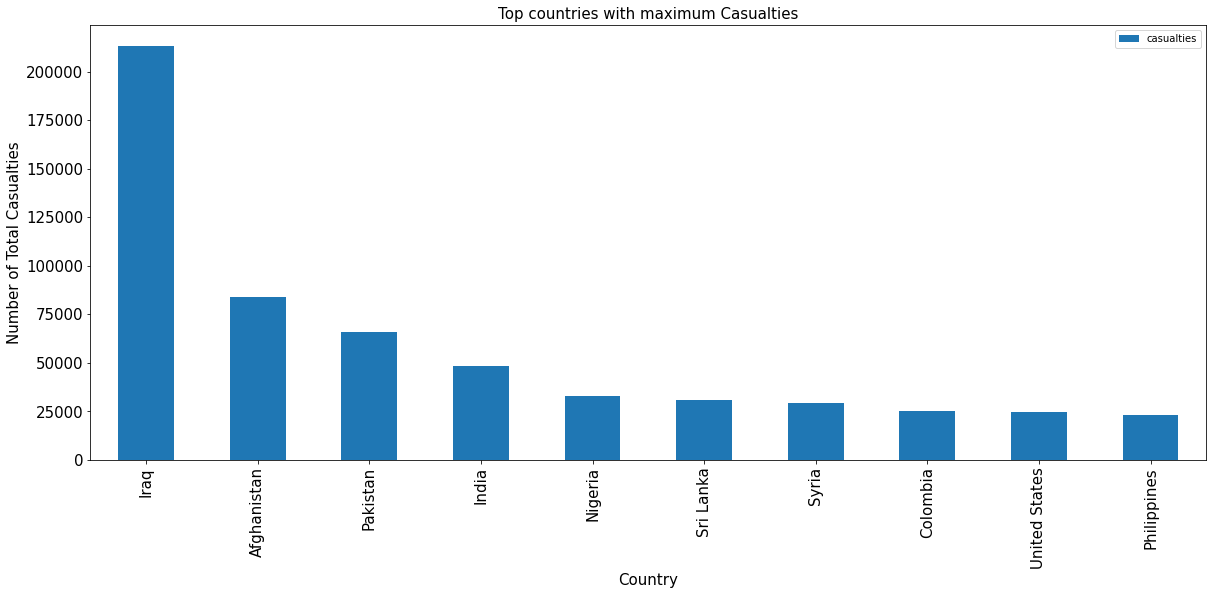

In [ ]:
top_country_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top countries with maximum Casualties", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

## **Region wise Attacks and Damages**

1. **Region wise Attacks**

In [ ]:
country_attacks = terrorism["country"].value_counts().reset_index().rename(columns={"index":"country", "country":"number_of_attacks"}).set_index('country')
country_attacks.sort_values('number_of_attacks', ascending=False)
top_country_attacks = country_attacks.head(10)
top_country_attacks

,number_of_attacks
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


Text(0, 0.5, 'Total Number of Attacks')

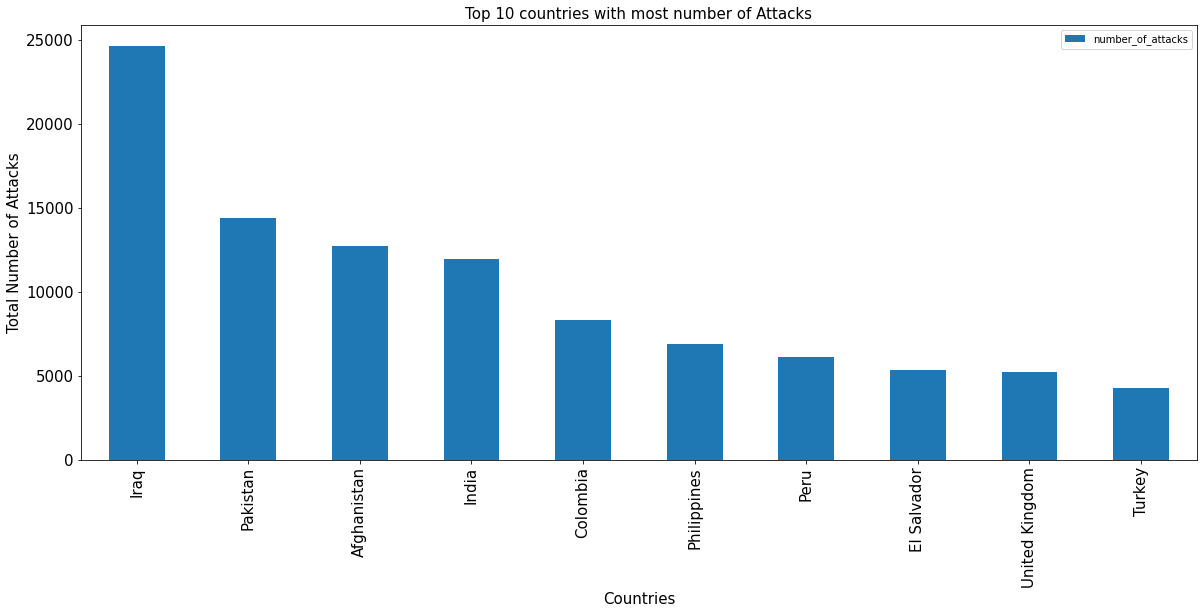

In [ ]:
top_country_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 countries with most number of Attacks", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

In [ ]:
print('The Countries with minimum number of attacks:')
country_attacks.loc[country_attacks['number_of_attacks'] == country_attacks['number_of_attacks'].min()]

The Country with minimum number of attacks:


,number_of_attacks
country,
Wallis and Futuna,1
St. Lucia,1
Falkland Islands,1
Andorra,1
Antigua and Barbuda,1
South Vietnam,1
New Hebrides,1
North Korea,1
Vatican City,1


2. **Country wise Killed**

In [ ]:
country_killed = terrorism[['country', 'killed']].groupby('country').sum().sort_values('killed', ascending=False)
top_country_killed = country_killed.head(10)
top_country_killed

,killed
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


Text(0, 0.5, 'Number of People Killed')

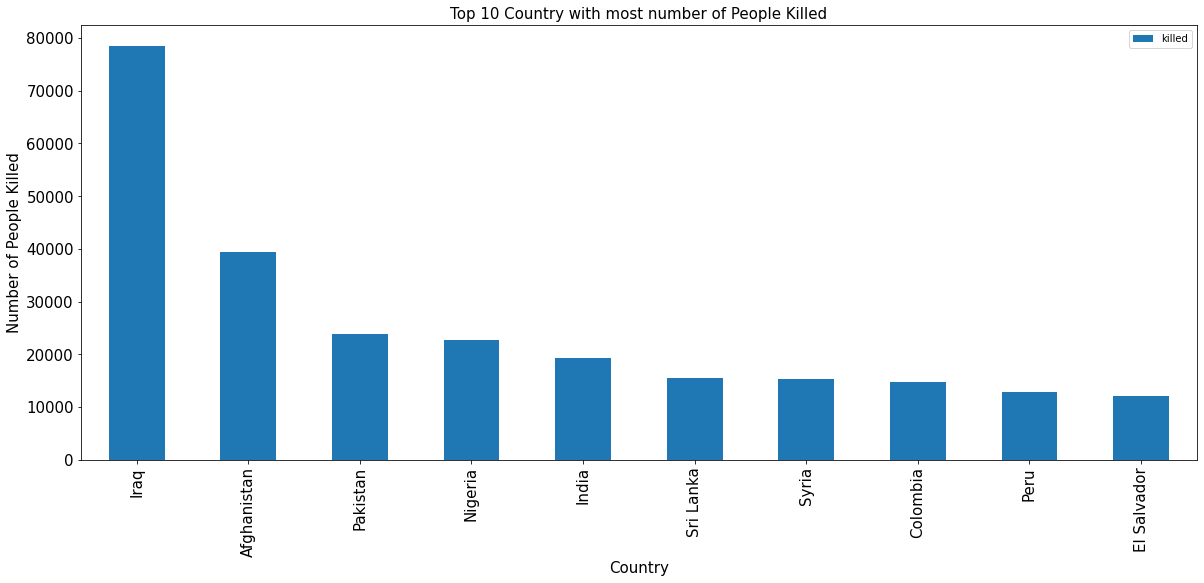

In [ ]:
top_country_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 Country with most number of People Killed", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

3. **Country wise Injured**

In [ ]:
country_injured = terrorism[['country', 'wounded']].groupby('country').sum().sort_values('wounded', ascending=False)
top_country_injured = country_injured.head(10)
top_country_injured

,wounded
country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


Text(0, 0.5, 'Number of People Injured')

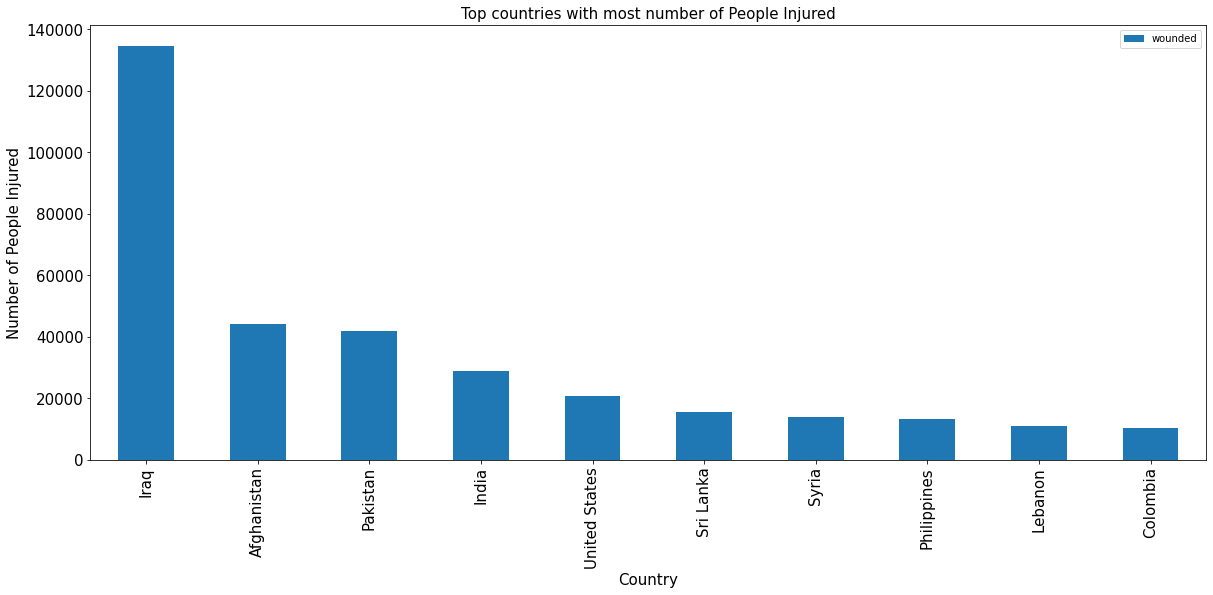

In [ ]:
top_country_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top countries with most number of People Injured", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

3. **Country wise total casualties**

In [ ]:
country_casualty = terrorism[['country', 'casualties']].groupby('country').sum().sort_values('casualties', ascending=False)
top_country_casualty = country_casualty.head(10)
top_country_casualty

,casualties
country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


Text(0, 0.5, 'Number of Total Casualties')

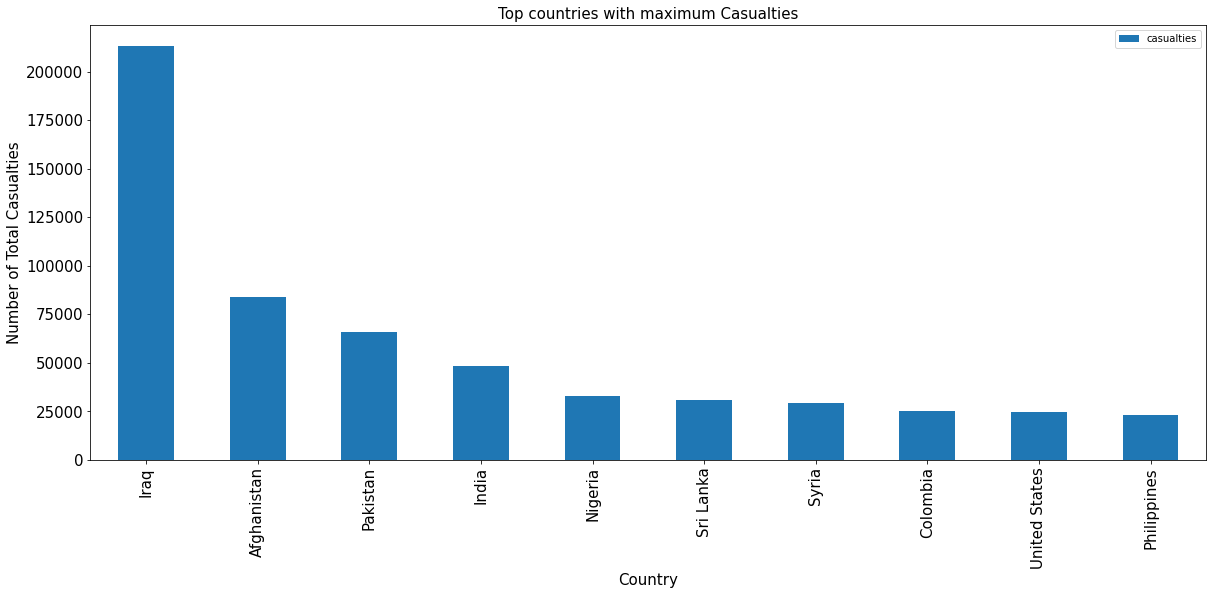

In [ ]:
top_country_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top countries with maximum Casualties", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

## **Region wise Attacks and Damages**

1. **Region wise Attacks**

In [ ]:
region_attacks = terrorism["region"].value_counts().reset_index().rename(columns={"index":"region","region":"number_of_attacks"}).set_index('region').sort_index()
region_attacks.head()

,number_of_attacks
region,
Australasia & Oceania,282
Central America & Caribbean,10344
Central Asia,563
East Asia,802
Eastern Europe,5144


Text(0, 0.5, 'Total Number of Attacks')

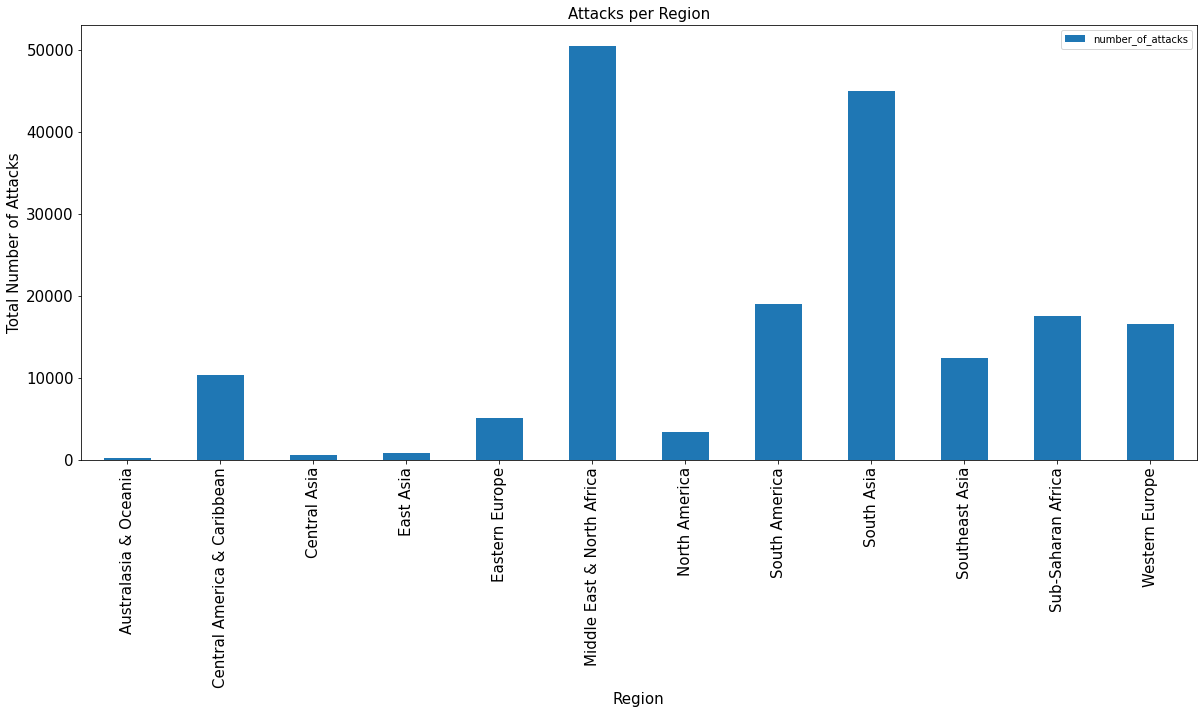

In [ ]:
region_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Attacks per Region", fontsize=15)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

In [ ]:
print('The Region with maximum number of attacks:')
region_attacks.loc[region_attacks['number_of_attacks'] == region_attacks['number_of_attacks'].max()]

The Region with maximum number of attacks:


,number_of_attacks
region,
Middle East & North Africa,50474


In [ ]:
print('The Region with minimum number of attacks:')
region_attacks.loc[region_attacks['number_of_attacks'] == region_attacks['number_of_attacks'].min()]

The Region with minimum number of attacks:


,number_of_attacks
region,
Australasia & Oceania,282


2. **Region wise Killed**

In [ ]:
region_killed = terrorism[['region', 'killed']].groupby('region').sum()
region_killed.head()

,killed
region,
Australasia & Oceania,150.0
Central America & Caribbean,28708.0
Central Asia,1000.0
East Asia,1152.0
Eastern Europe,7415.0


Text(0, 0.5, 'Number of People Killed')

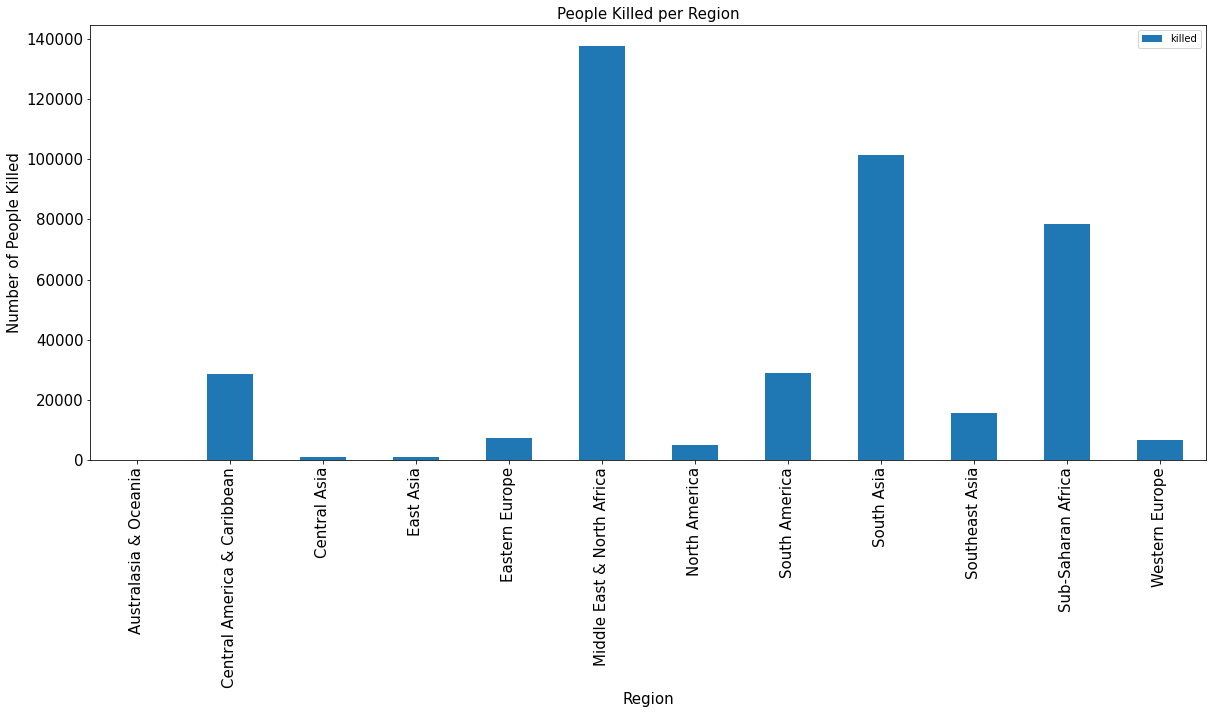

In [ ]:
region_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Killed per Region", fontsize=15)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

In [ ]:
print('The Region with maximum number of people killed:')
region_killed.loc[region_killed['killed'] == region_killed['killed'].max()]

The Region with maximum number of people killed:


,killed
region,
Middle East & North Africa,137642.0


In [ ]:
print('The Region with minimum number of people killed:')
region_killed.loc[region_killed['killed'] == region_killed['killed'].min()]

The Region with minimum number of people killed:


,killed
region,
Australasia & Oceania,150.0


3. **Region wise Injured**

In [ ]:
region_injured = terrorism[['region', 'wounded']].groupby('region').sum()
region_injured.head()

,wounded
region,
Australasia & Oceania,260.0
Central America & Caribbean,8991.0
Central Asia,2009.0
East Asia,9213.0
Eastern Europe,12045.0


Text(0, 0.5, 'Number of People Injured')

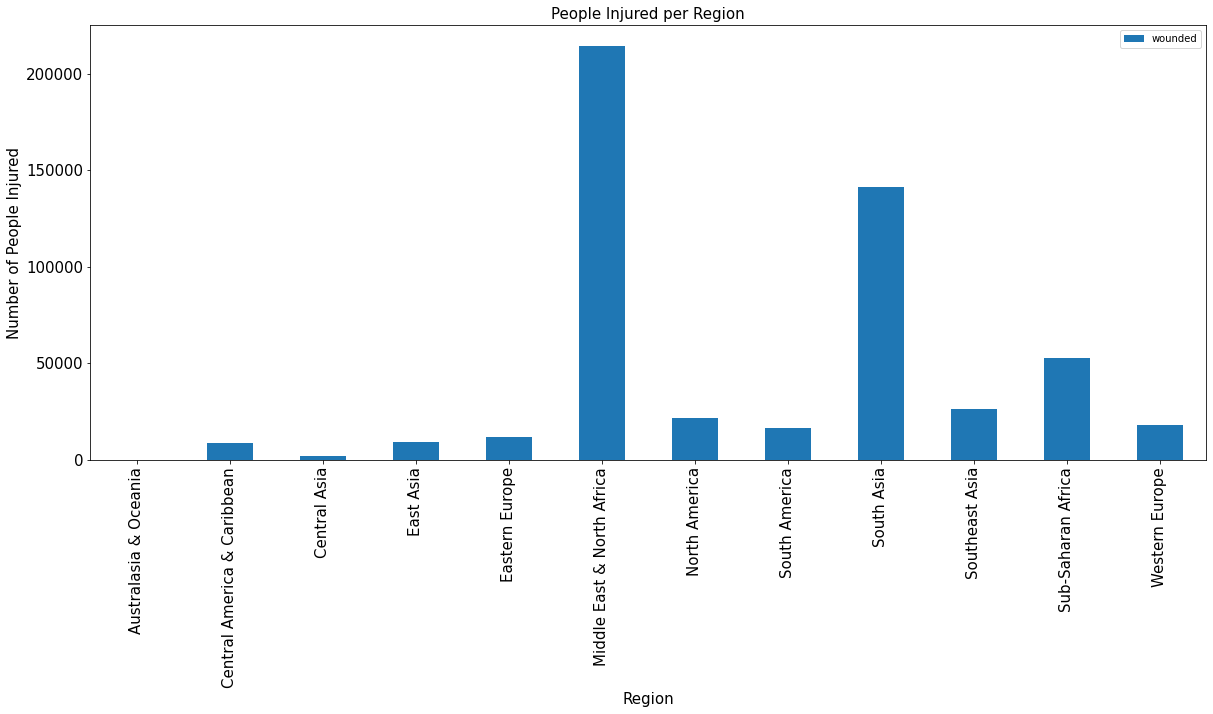

In [ ]:
region_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("People Injured per Region", fontsize=15)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

In [ ]:
print('The Region with maximum number of people injured:')
region_injured.loc[region_injured['wounded'] == region_injured['wounded'].max()]

The Region with maximum number of people injured:


,wounded
region,
Middle East & North Africa,214308.0


In [ ]:
print('The Region with minimum number of people injured:')
region_injured.loc[region_injured['wounded'] == region_injured['wounded'].min()]

The Region with minimum number of people injured:


,wounded
region,
Australasia & Oceania,260.0


3. **Region wise total casualties**

In [ ]:
region_casualty = terrorism[['region', 'casualties']].groupby('region').sum()
region_casualty.head()

,casualties
region,
Australasia & Oceania,410.0
Central America & Caribbean,37699.0
Central Asia,3009.0
East Asia,10365.0
Eastern Europe,19460.0


Text(0, 0.5, 'Number of Total Casualties')

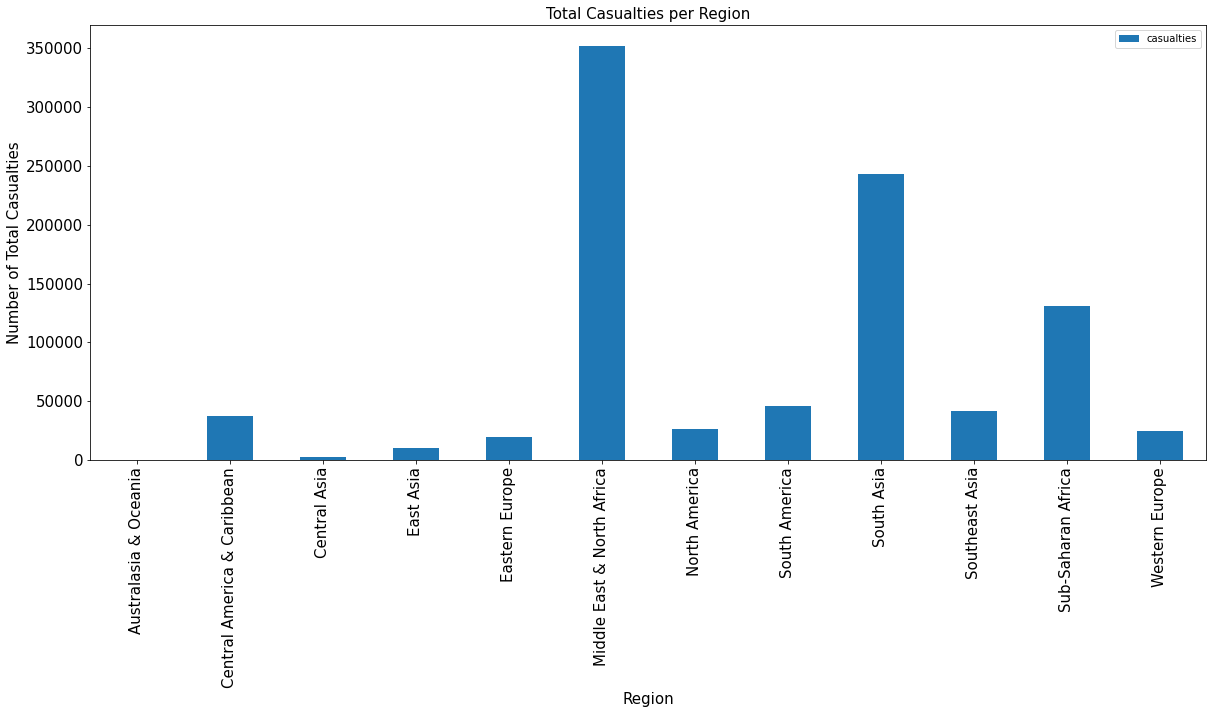

In [ ]:
region_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Total Casualties per Region", fontsize=15)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

In [ ]:
print('The Region with maximum number of casualties:')
region_casualty.loc[region_casualty['casualties'] == region_casualty['casualties'].max()]

The Region with maximum number of casualties:


,casualties
region,
Middle East & North Africa,351950.0


In [ ]:
print('The Region with minimum number of casualties:')
region_casualty.loc[region_casualty['casualties'] == region_casualty['casualties'].min()]

The Region with minimum number of casualties:


,casualties
region,
Australasia & Oceania,410.0


In [ ]:
country_grp = terrorism.groupby(['country'])

In [ ]:
country_grp.get_group('India')

## **City wise Attacks and Damages**

1. **City wise Attacks**

In [ ]:
city_attacks = terrorism["city"].value_counts().reset_index().rename(columns={"index":"city", "city":"number_of_attacks"}).set_index('city').drop('Unknown')
city_attacks.sort_values('number_of_attacks', ascending=False)
top_city_attacks = city_attacks.head(10)
top_city_attacks

,number_of_attacks
city,
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


Text(0, 0.5, 'Total Number of Attacks')

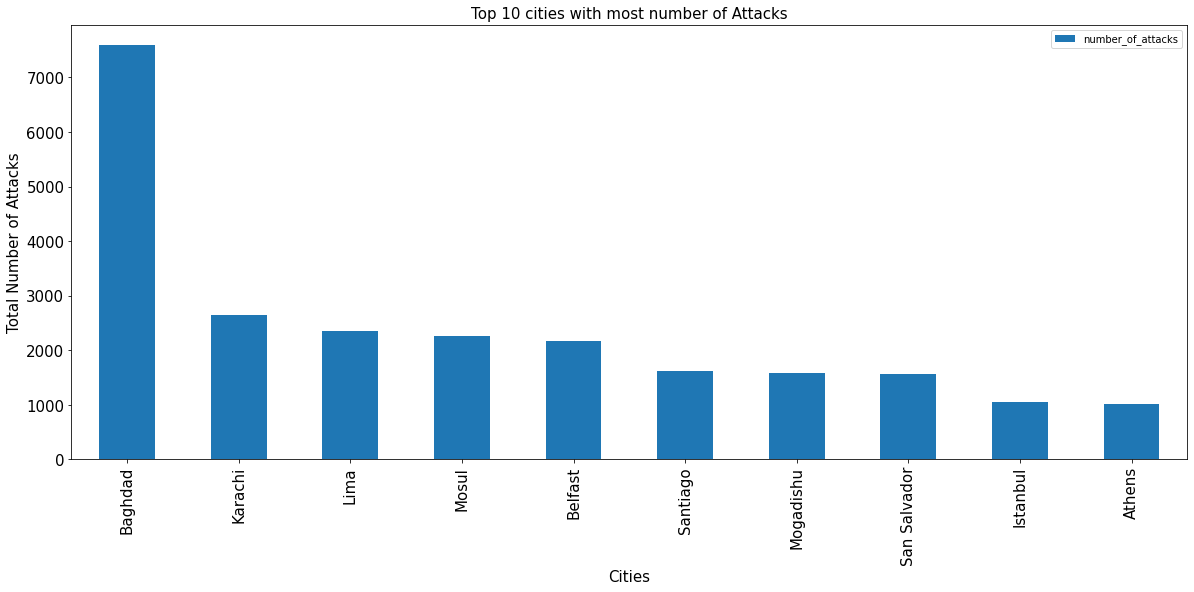

In [ ]:
top_city_attacks.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 cities with most number of Attacks", fontsize=15)
plt.xlabel("Cities", fontsize=15)
plt.ylabel("Total Number of Attacks", fontsize=15)

2. **City wise Killed**

In [ ]:
city_killed = terrorism[['city', 'killed']].groupby('city').sum().sort_values('killed', ascending=False).drop('Unknown')
top_city_killed = city_killed.head(10)
top_city_killed

,killed
city,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


Text(0, 0.5, 'Number of People Killed')

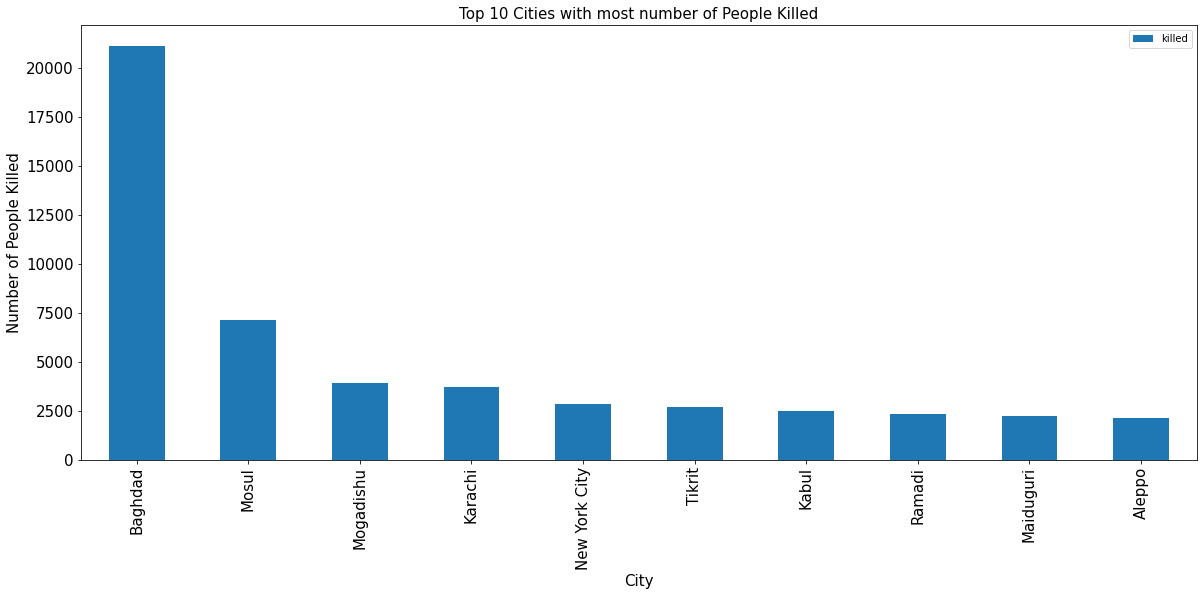

In [ ]:
top_city_killed.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top 10 Cities with most number of People Killed", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

3. **City wise Injured**

In [ ]:
city_injured = terrorism[['city', 'wounded']].groupby('city').sum().sort_values('wounded', ascending=False).drop('Unknown')
top_city_injured = city_injured.head(10)
top_city_injured

,wounded
city,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


Text(0, 0.5, 'Number of People Injured')

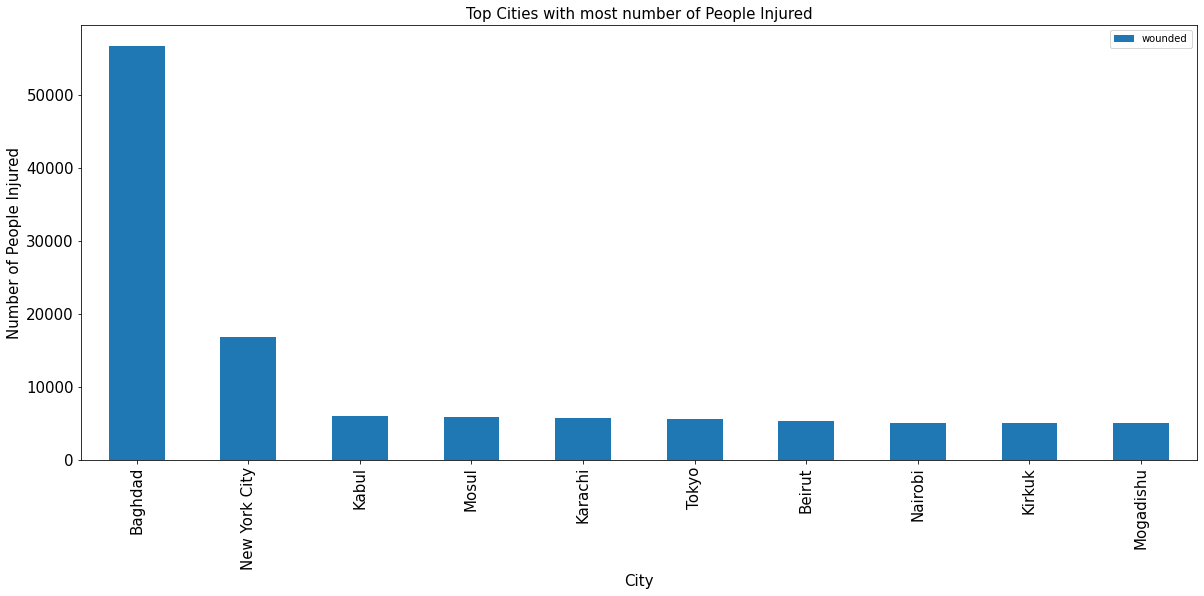

In [ ]:
top_city_injured.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top Cities with most number of People Injured", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

3. **City wise total casualties**

In [ ]:
city_casualty = terrorism[['city', 'casualties']].groupby('city').sum().sort_values('casualties', ascending=False).drop('Unknown')
top_city_casualty = city_casualty.head(10)
top_city_casualty

,casualties
city,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


Text(0, 0.5, 'Number of Total Casualties')

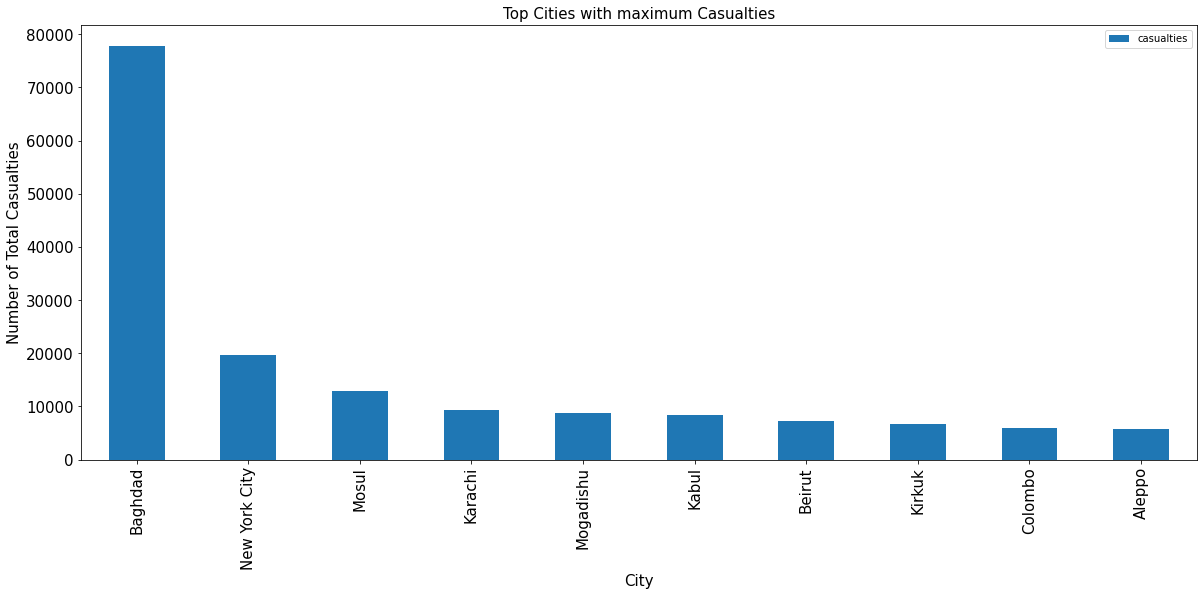

In [ ]:
top_city_casualty.plot(kind="bar", fontsize=15, figsize=(20, 8))
plt.title("Top Cities with maximum Casualties", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

## **Terrorist Group wise Attacks and Damages**

1. **Terrorist group wise Attacks**

In [ ]:
tg_attacks = terrorism['terrorist_group'].value_counts().drop('Unknown').head(10)
tg_attacks

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: terrorist_group, dtype: int64

Text(0, 0.5, 'Number of Total Attacks')

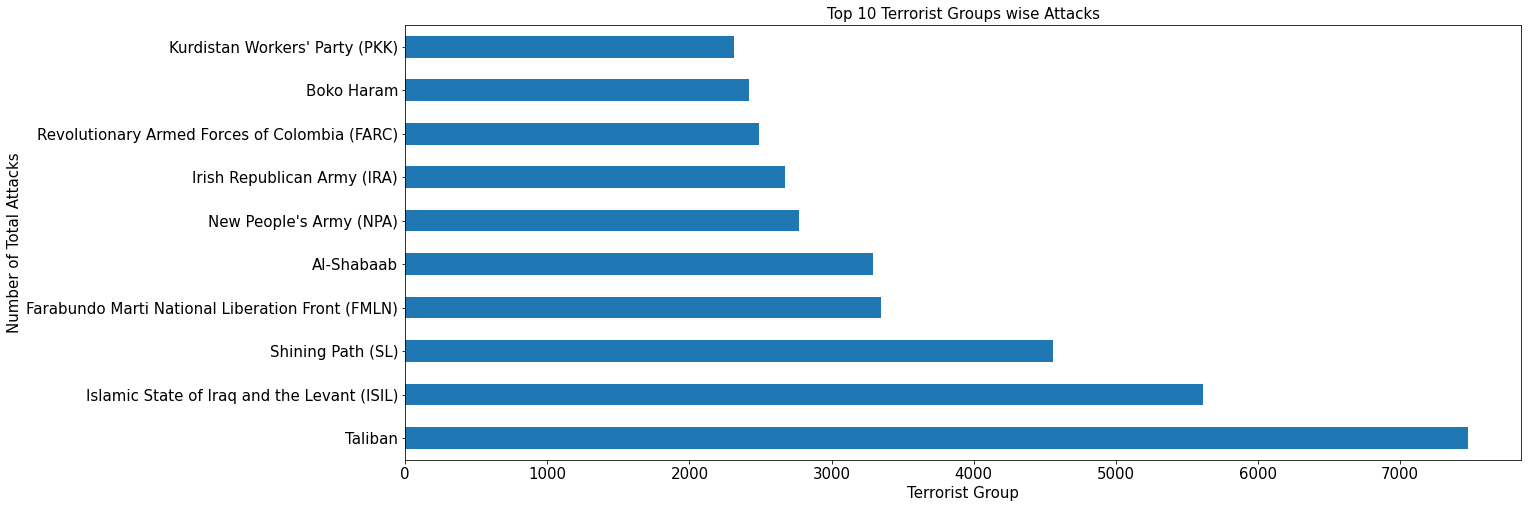

In [ ]:
tg_attacks.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Top 10 Terrorist Groups wise Attacks", fontsize=15)
plt.xlabel("Terrorist Group", fontsize=15)
plt.ylabel("Number of Total Attacks", fontsize=15)

2. **Terrorist group wise killed**

In [ ]:
tg_killed = terrorism[['terrorist_group', 'killed']].groupby('terrorist_group').sum().sort_values('killed', ascending=False).drop('Unknown').head(10)
tg_killed

,killed
terrorist_group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


Text(0, 0.5, 'Number of People Killed')

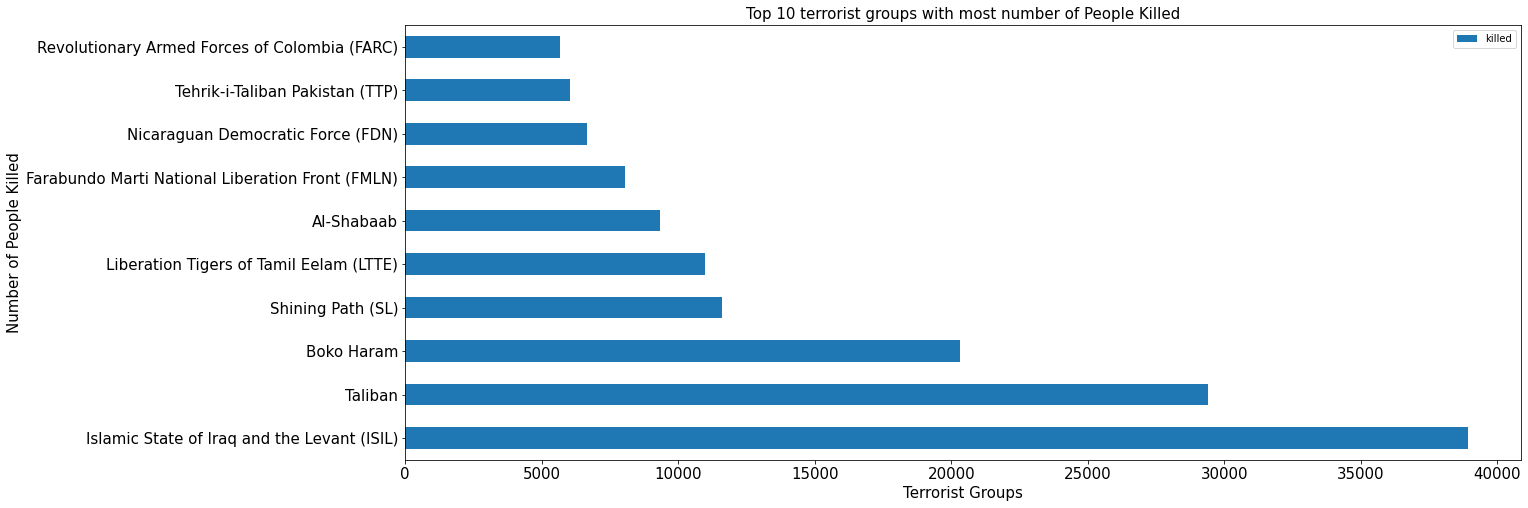

In [ ]:
tg_killed.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Top 10 terrorist groups with most number of People Killed", fontsize=15)
plt.xlabel("Terrorist Groups", fontsize=15)
plt.ylabel("Number of People Killed", fontsize=15)

3. **Terrorist group wise injured**

In [ ]:
tg_injured = terrorism[['terrorist_group', 'wounded']].groupby('terrorist_group').sum().sort_values('wounded', ascending=False).drop('Unknown').head(10)
tg_injured

,wounded
terrorist_group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


Text(0, 0.5, 'Number of People Injured')

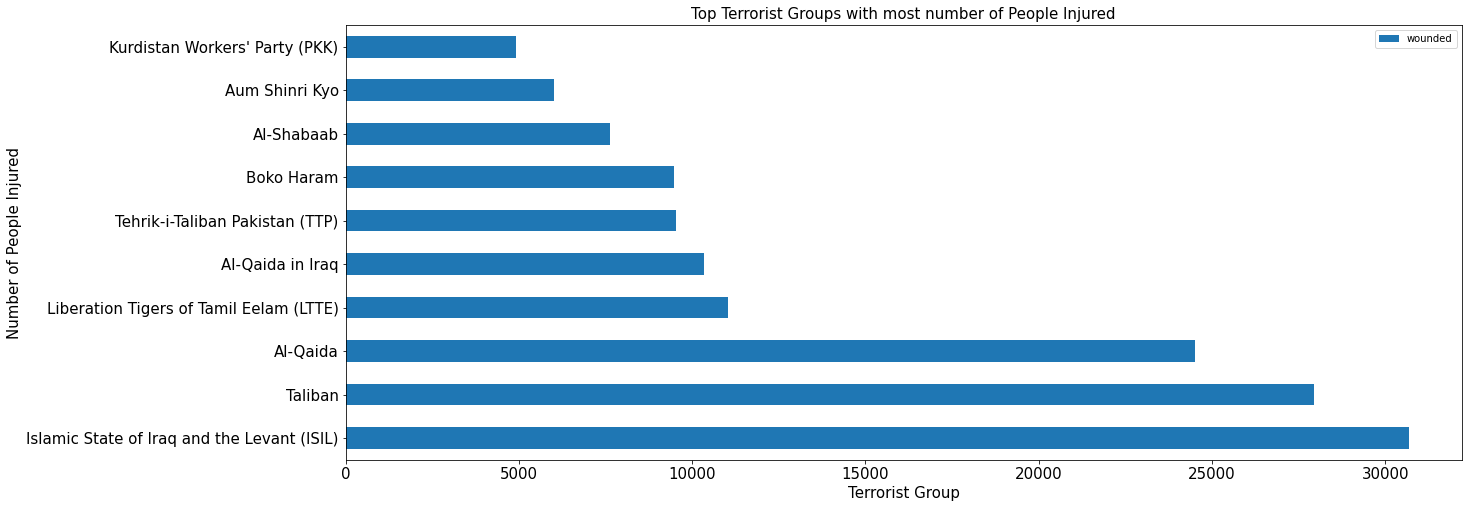

In [ ]:
tg_injured.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Top Terrorist Groups with most number of People Injured", fontsize=15)
plt.xlabel("Terrorist Group", fontsize=15)
plt.ylabel("Number of People Injured", fontsize=15)

3. **Terrorist Group wise total casualties**

In [ ]:
tg_casualty = terrorism[['terrorist_group', 'casualties']].groupby('terrorist_group').sum().sort_values('casualties', ascending=False).drop('Unknown').head(10)
tg_casualty

,casualties
terrorist_group,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


Text(0, 0.5, 'Number of Total Casualties')

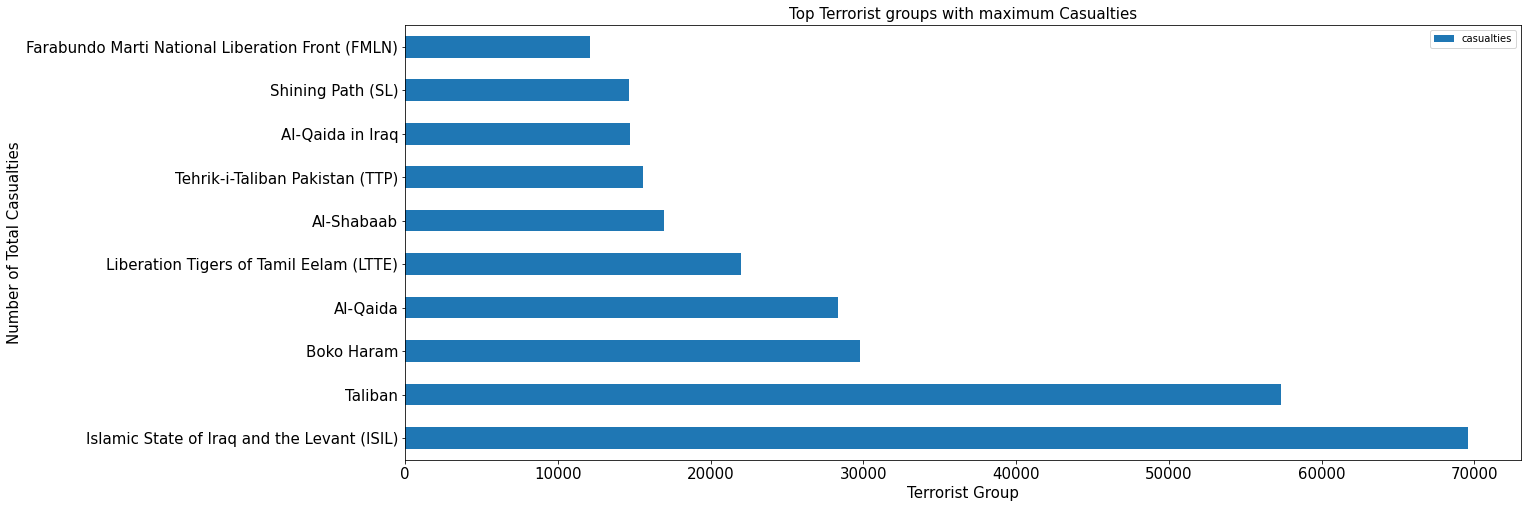

In [ ]:
tg_casualty.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Top Terrorist groups with maximum Casualties", fontsize=15)
plt.xlabel("Terrorist Group", fontsize=15)
plt.ylabel("Number of Total Casualties", fontsize=15)

## **Attack Type wise Attacks and Damages**

1. **Attack Type wise attacks**

In [9]:
at_attacks = terrorism['attack_type'].value_counts()
at_attacks

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

Text(0, 0.5, 'Number of Attacks')

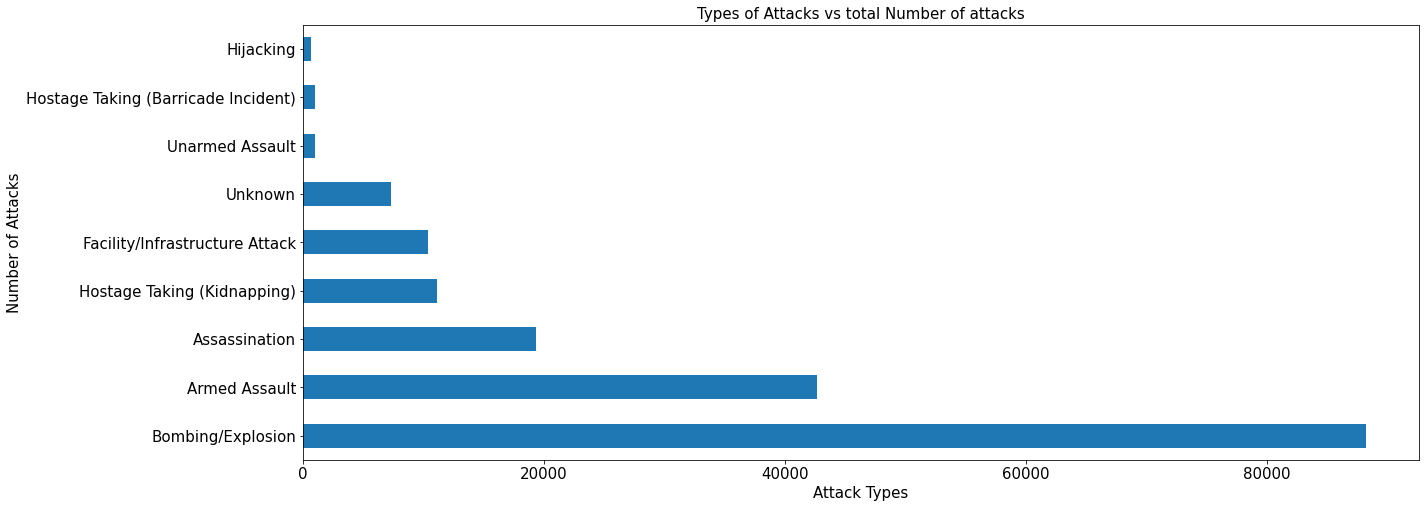

In [67]:
at_attacks.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Types of Attacks vs total Number of attacks", fontsize=15)
plt.xlabel("Attack Types", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)

In [49]:
attack_type = at_attacks.index.to_list()
no_of_attacks = at_attacks.to_list()

In [50]:
attack_percent = []
for i in no_of_attacks:
    percent=(i*100)/len(terrorism['attack_type'])
    attack_percent.append(percent)

In [58]:
labels = attack_type[0:5]
labels.append('Others')
labels

['Bombing/Explosion',
 'Armed Assault',
 'Assassination',
 'Hostage Taking (Kidnapping)',
 'Facility/Infrastructure Attack',
 'Others']

In [59]:
size = attack_percent[0:5]
size.append(sum(attack_percent[5:]))
size

[48.57422767225675,
 23.484377321936694,
 10.629035009989488,
 6.141195766438623,
 5.699787001007205,
 5.471377228371246]

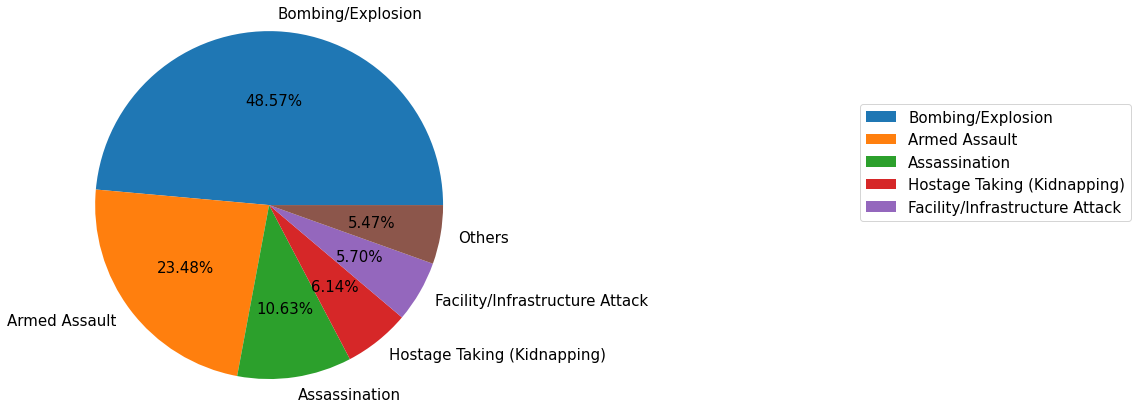

In [66]:
plt.pie(size, labels = labels, radius=2, textprops={"fontsize":15}, autopct = "%0.2f%%")
plt.legend(bbox_to_anchor=(4.5, 1), fontsize=15, labels=attack_type)

2. **attack type wise Total Damages**

In [72]:
at_casualties=terrorism[["attack_type","casualties"]].groupby("attack_type").sum().sort_values("casualties",ascending=False)
at_casualties

,casualties
attack_type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


Text(0, 0.5, 'Number of casualties')

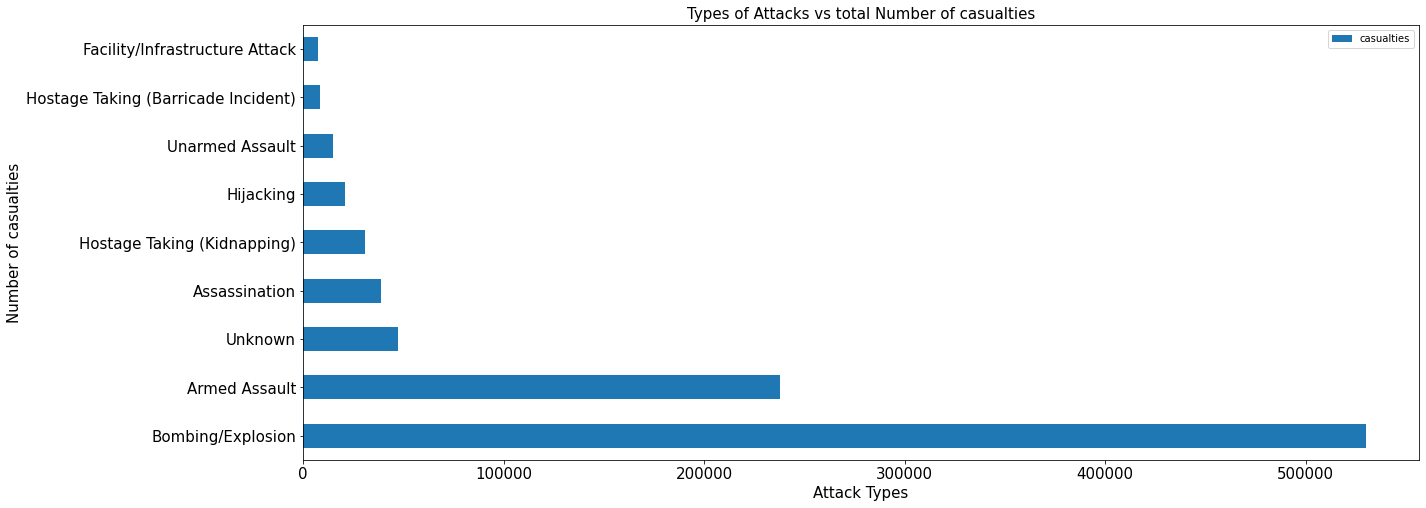

In [73]:
at_casualties.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Types of Attacks vs total Number of casualties", fontsize=15)
plt.xlabel("Attack Types", fontsize=15)
plt.ylabel("Number of casualties", fontsize=15)

3. **attack type wise killed**

In [74]:
at_killed=terrorism[["attack_type","killed"]].groupby("attack_type").sum().sort_values("killed",ascending=False)
at_killed

,killed
attack_type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


Text(0, 0.5, 'Number of people killed')

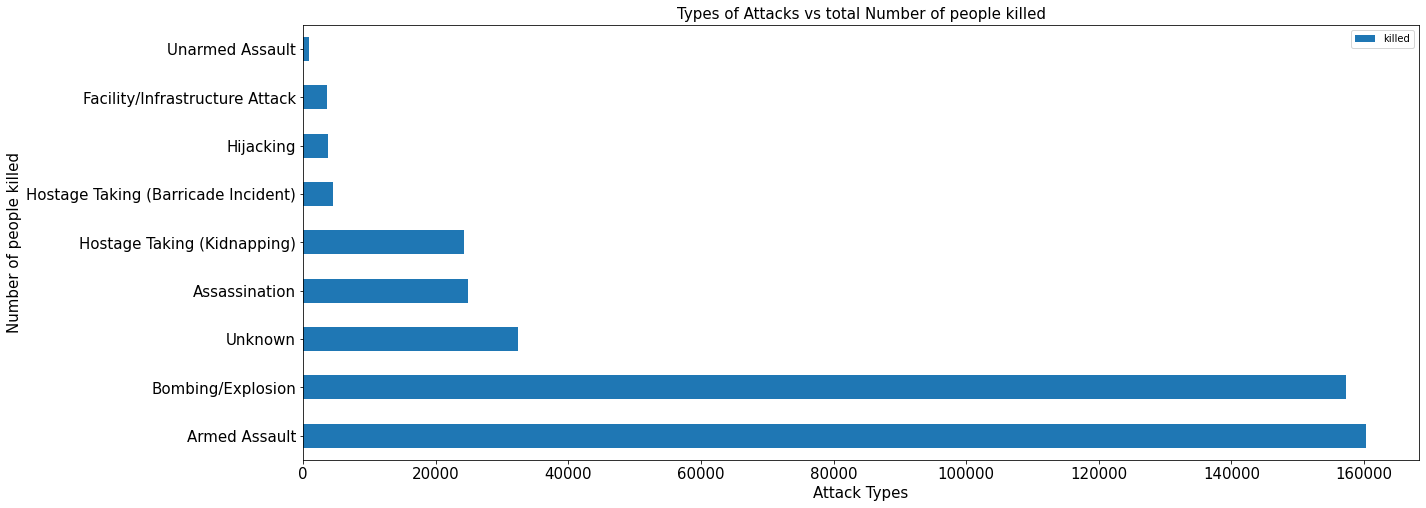

In [75]:
at_killed.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Types of Attacks vs total Number of people killed", fontsize=15)
plt.xlabel("Attack Types", fontsize=15)
plt.ylabel("Number of people killed", fontsize=15)

4. **Attack type wise injured**

In [76]:
at_injured=terrorism[["attack_type","wounded"]].groupby("attack_type").sum().sort_values("wounded",ascending=False)
at_injured

,wounded
attack_type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


Text(0, 0.5, 'Number of people Injured')

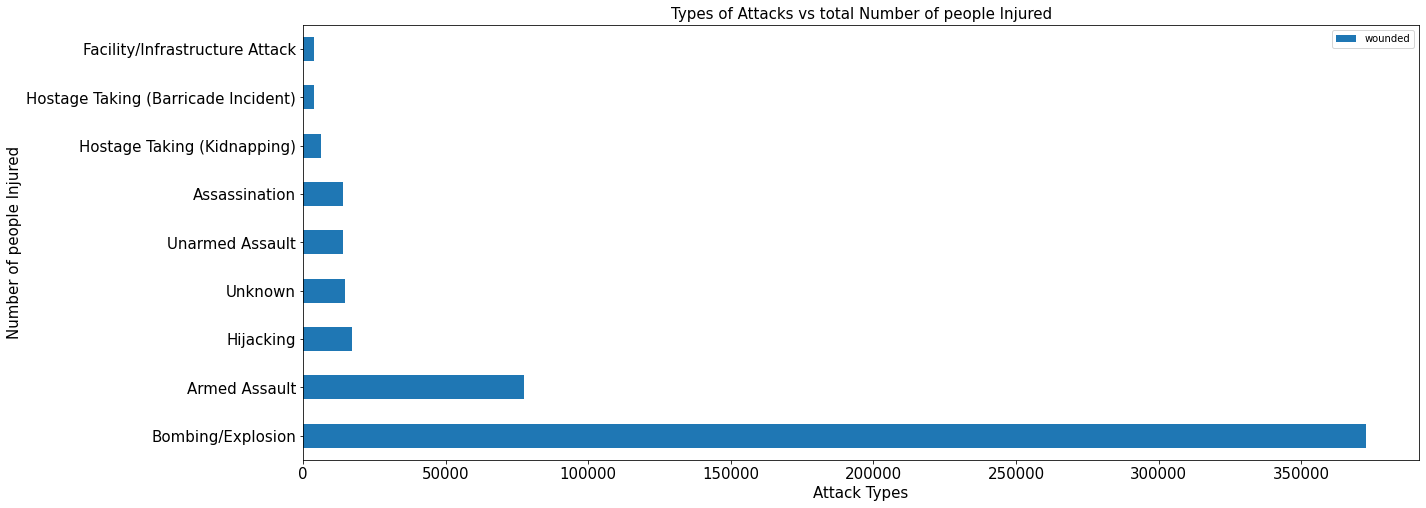

In [77]:
at_injured.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Types of Attacks vs total Number of people Injured", fontsize=15)
plt.xlabel("Attack Types", fontsize=15)
plt.ylabel("Number of people Injured", fontsize=15)

# **Target Type wise Attacks and Damages**

1. **Target type wise attacks**

In [78]:
tt_attacks = terrorism['target_type'].value_counts()
tt_attacks

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64

Text(0, 0.5, 'no of attacks')

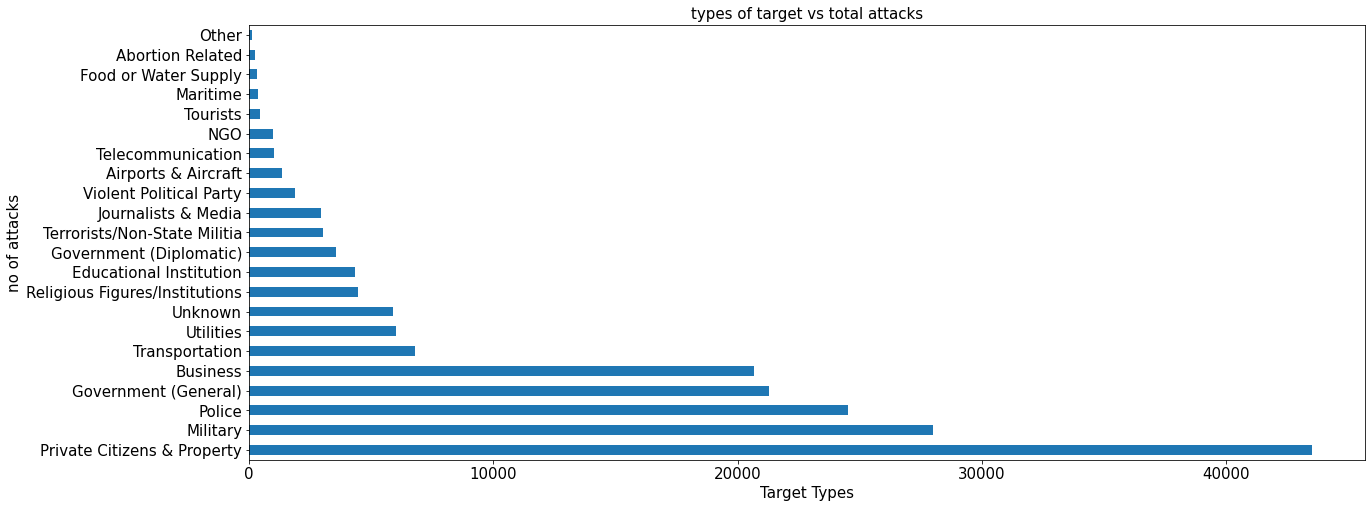

In [79]:
tt_attacks.plot(kind='barh', fontsize=15, figsize=(20, 8))
plt.title('types of target vs total attacks', fontsize=15)
plt.xlabel('Target Types', fontsize=15)
plt.ylabel('no of attacks', fontsize=15)

2. **target type wise casualties**

In [81]:
tt_casualties=terrorism[["target_type","casualties"]].groupby("target_type").sum().sort_values("casualties",ascending=False)
tt_casualties

,casualties
target_type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


Text(0, 0.5, 'Number of casualties')

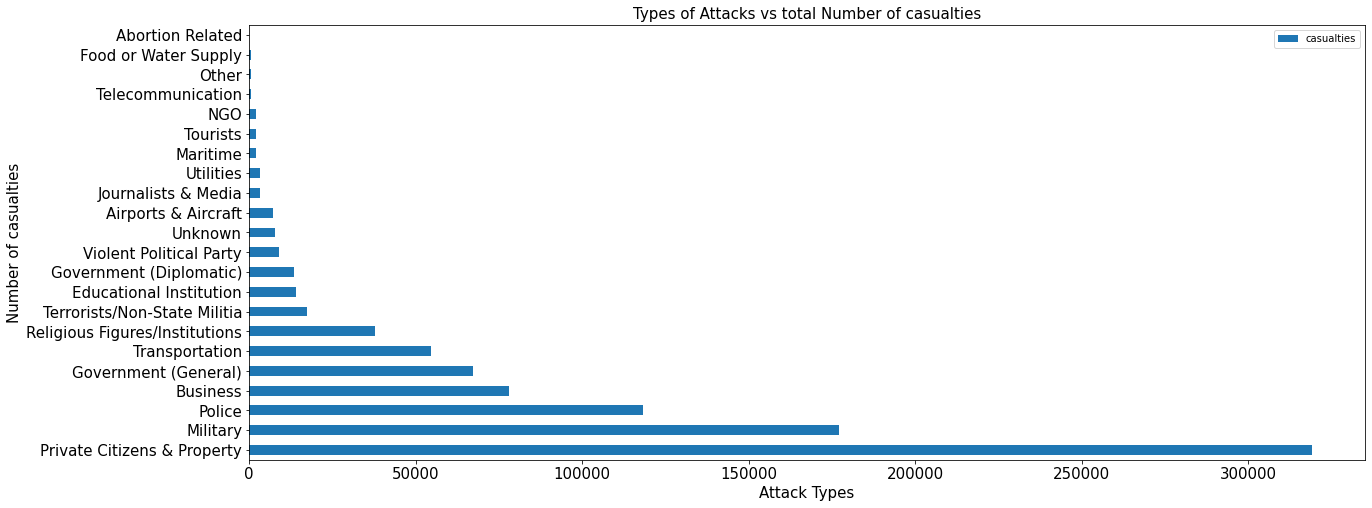

In [82]:
tt_casualties.plot(kind="barh", fontsize=15, figsize=(20, 8))
plt.title("Types of Attacks vs total Number of casualties", fontsize=15)
plt.xlabel("Attack Types", fontsize=15)
plt.ylabel("Number of casualties", fontsize=15)

# **Weapon type attacks and damages**

1. **weapon type attacks**

In [83]:
wt_attacks = terrorism['weapon_type'].value_counts()
wt_attacks

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

2. **weapon type damages**

In [84]:
wt_casualties=terrorism[["weapon_type","casualties"]].groupby("weapon_type").sum().sort_values("casualties",ascending=False)
wt_casualties

,casualties
weapon_type,
Explosives,560181.0
Firearms,252113.0
Unknown,60195.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",20305.0
Melee,16070.0
Chemical,14449.0
Incendiary,11006.0
Biological,814.0
Sabotage Equipment,369.0


# **Terrorist group and country wise attacks**

In [95]:
tgc_attacks = terrorism[['terrorist_group', 'country']].value_counts().drop('Unknown')
top_tgc_attacks = tgc_attacks.head(10)
top_tgc_attacks

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


terrorist_group                                   country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

Text(0, 0.5, 'Number of Attacks')

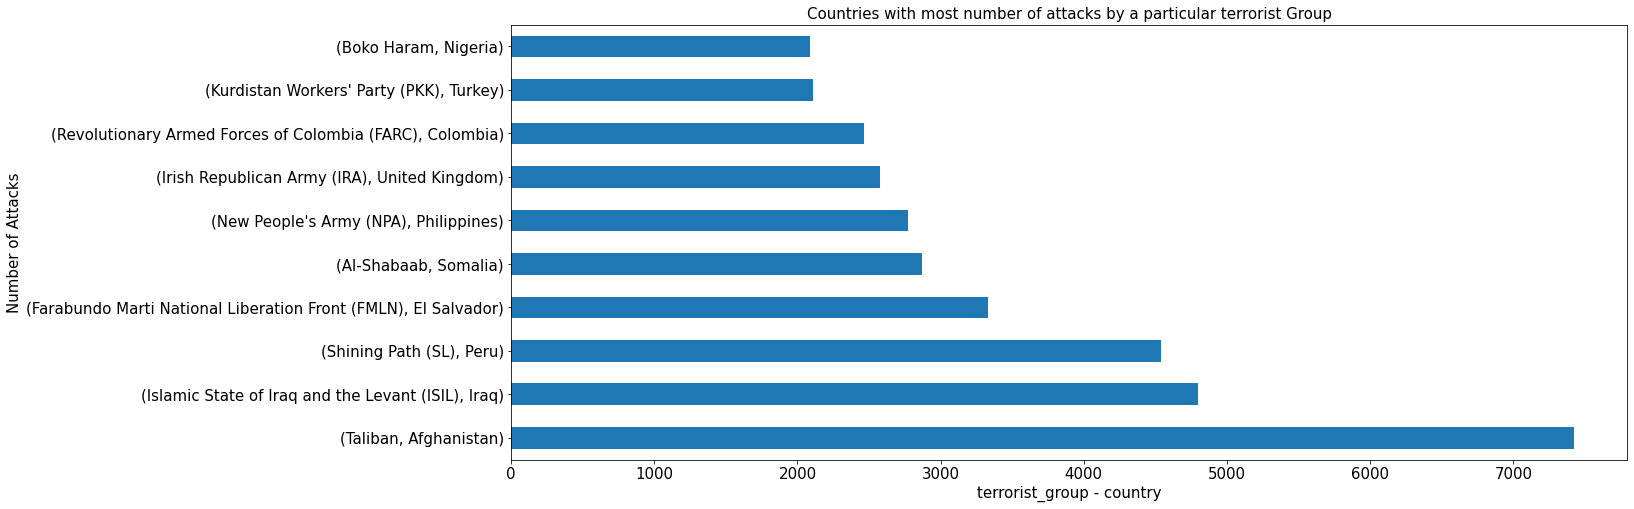

In [100]:
top_tgc_attacks.plot(kind="barh",figsize=(20,8), fontsize=15)
plt.title("Countries with most number of attacks by a particular terrorist Group", fontsize=15)
plt.xlabel("terrorist_group - country", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)

2. **casualties in a counry by group**

In [102]:
tgc_casualties=terrorism[["terrorist_group","country","casualties"]].groupby(["terrorist_group","country"],axis=0).sum().sort_values(by="casualties",ascending=False)
top_tgc_casualties = tgc_casualties.drop("Unknown").head(10)
top_tgc_casualties

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,casualties
terrorist_group,country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


Text(0, 0.5, 'Number of casualties')

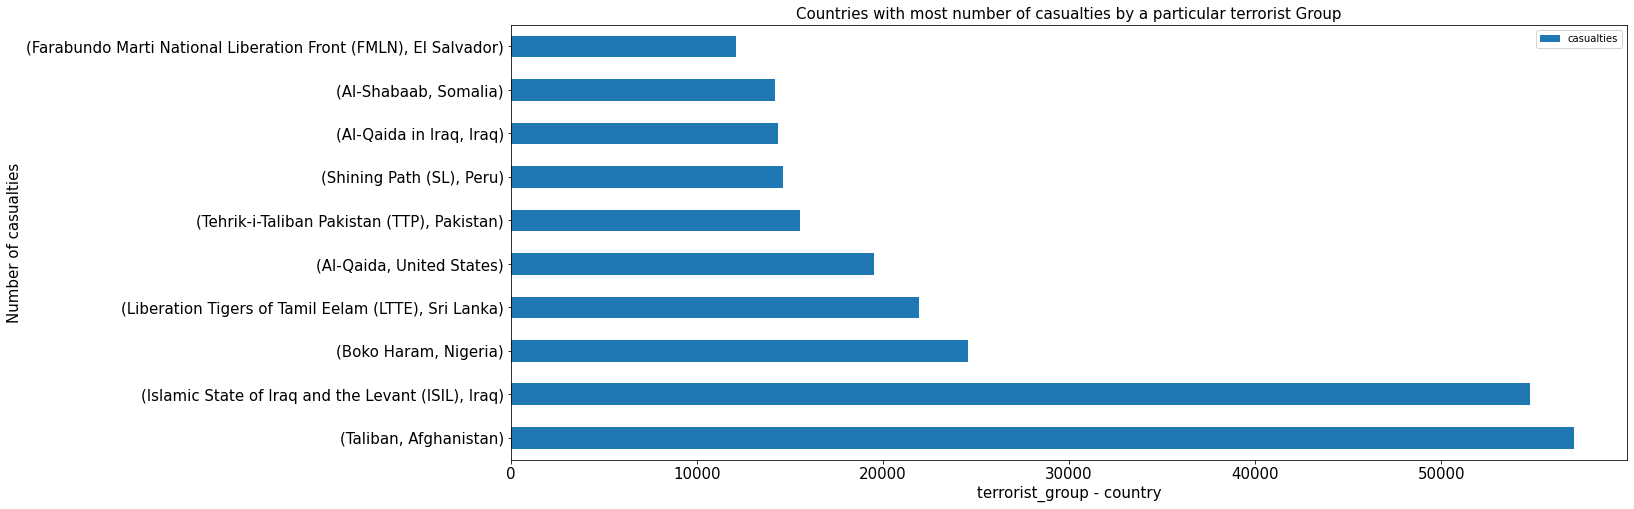

In [103]:
top_tgc_casualties.plot(kind="barh",figsize=(20,8), fontsize=15)
plt.title("Countries with most number of casualties by a particular terrorist Group", fontsize=15)
plt.xlabel("terrorist_group - country", fontsize=15)
plt.ylabel("Number of casualties", fontsize=15)

2. **killed in a counry by group**

In [104]:
tgc_killed=terrorism[["terrorist_group","country","killed"]].groupby(["terrorist_group","country"],axis=0).sum().sort_values(by="killed",ascending=False)
top_tgc_killed = tgc_killed.drop("Unknown").head(10)
top_tgc_killed

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,killed
terrorist_group,country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


4 . **Total casualties World-Wide by Terrorist Attacks from 1970 to 2017**

In [183]:
casualty=terrorism.loc[:,"casualties"].sum()
print("Total number of Casualties Terrorist Attacks from 1970 to 2017:\n", casualty)

Total number of Casualties Terrorist Attacks from 1970 to 2017:
 935737.0


4 . **Total people killed World-Wide by Terrorist Attacks from 1970 to 2017**

In [184]:
killed=terrorism.loc[:,"killed"].sum()
print("Total number of people killed by Terrorist Attacks from 1970 to 2017:\n", killed)

Total number of people killed by Terrorist Attacks from 1970 to 2017:
 411868.0


4 . **Total people injuered World-Wide by Terrorist Attacks from 1970 to 2017**

In [185]:
injured=terrorism.loc[:,"wounded"].sum()
print("Total number of People injured by Terrorist Attacks from 1970 to 2017:\n", injured)

Total number of People injured by Terrorist Attacks from 1970 to 2017:
 523869.0


# **India affected by terrorism**

In [105]:
country_grp = terrorism.groupby(['country'])
ind_df = country_grp.get_group('India')

In [107]:
ind_df.head()

,year,country,region,province/state,city,location,success,suicide,claimed,attack_type,target_type,terrorist_group,motive,weapon_type,killed,wounded,casualties
1186,1972,India,South Asia,Delhi,New Delhi,NaN,1,0,NaN,Hijacking,Airports & Aircraft,Palestinians,NaN,Explosives,0.0,0.0,0.0
2764,1975,India,South Asia,Bihar,Samastipur,The attack occurred in the town,1,0,0.0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,4.0
3857,1976,India,South Asia,Delhi,New Delhi,NaN,1,0,NaN,Bombing/Explosion,Airports & Aircraft,Unknown,NaN,Explosives,0.0,0.0,0.0
5327,1977,India,South Asia,Maharashtra,Bombay,NaN,1,0,NaN,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),NaN,Firearms,0.0,0.0,0.0
7337,1979,India,South Asia,Assam,Unknown,NaN,1,0,NaN,Armed Assault,Police,Naga People,NaN,Firearms,0.0,0.0,0.0


1. **year wise attacks**

In [116]:
ya = ind_df['year'].value_counts()
ya.head()

2016    1025
2017     966
2015     884
2014     860
2013     694
Name: year, dtype: int64

Text(0, 0.5, 'Number of Attacks')

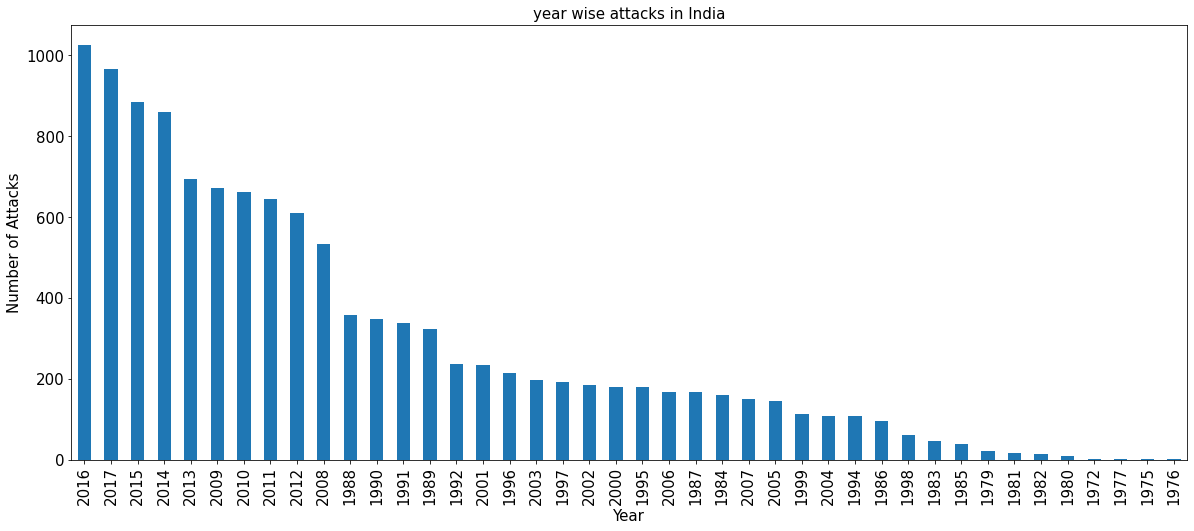

In [114]:
ya.plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("year wise attacks in India", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)

2. **year wise killed**

In [121]:
yk = ind_df[['year', 'killed']].groupby('year').sum()
yk.sort_values('killed', ascending=False).head()

,killed
year,
1992,1152.0
1991,1113.0
1988,966.0
1990,907.0
1989,874.0


Text(0, 0.5, 'Number of people killed')

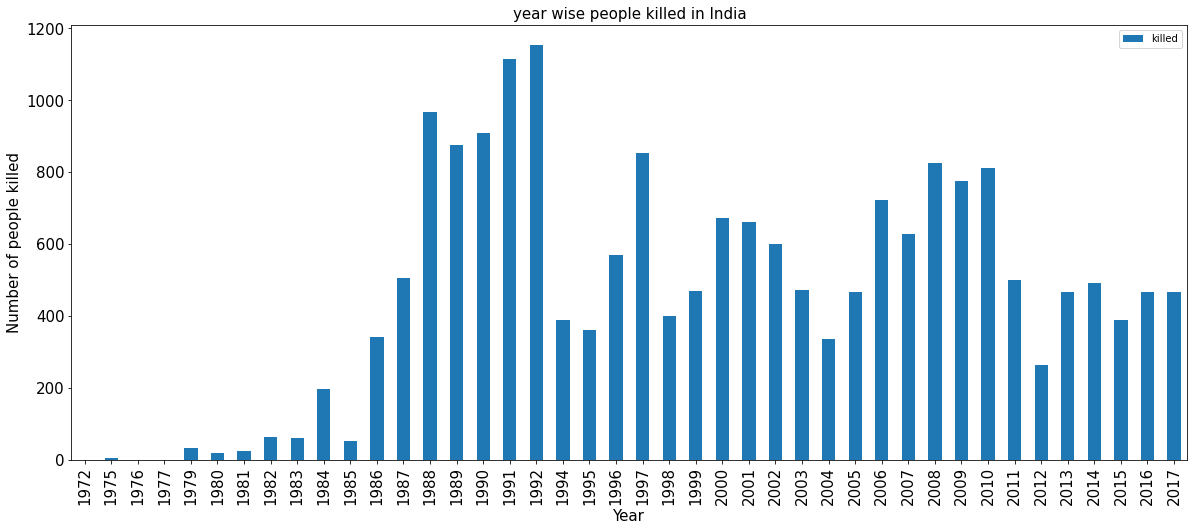

In [117]:
yk.plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("year wise people killed in India", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of people killed", fontsize=15)

2. **year wise injured**

In [122]:
yw = ind_df[['year', 'wounded']].groupby('year').sum()
yw.sort_values('wounded', ascending=False).head()

,wounded
year,
2006,2138.0
2008,1759.0
1997,1416.0
1991,1326.0
2005,1216.0


Text(0, 0.5, 'Number of people injured')

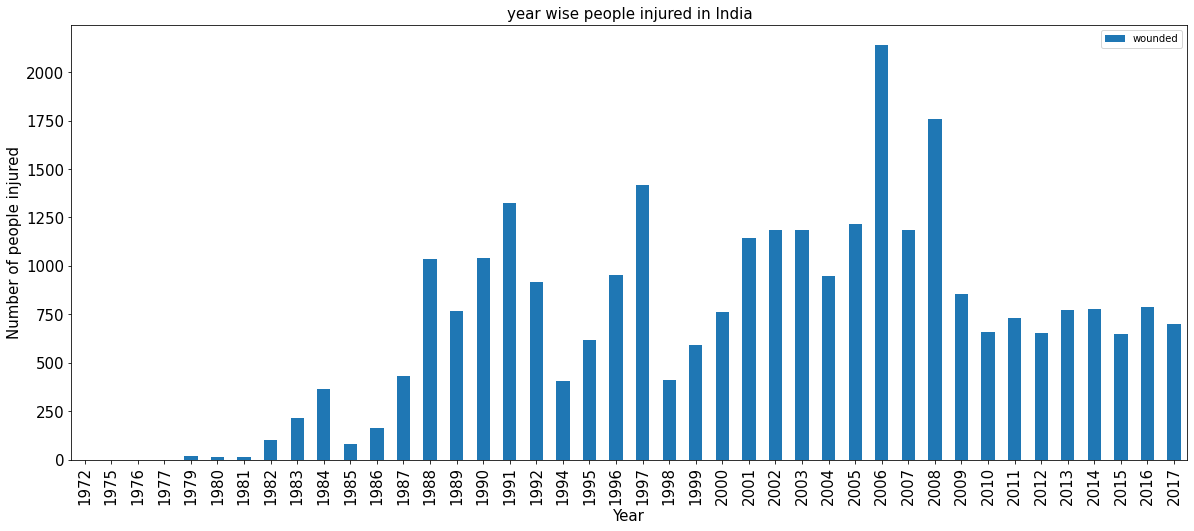

In [123]:
yw.plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("year wise people injured in India", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of people injured", fontsize=15)

2. **year wise casualties**

In [124]:
yc = ind_df[['year', 'casualties']].groupby('year').sum()
yc.sort_values('casualties', ascending=False).head()

,casualties
year,
2006,2860.0
2008,2583.0
1991,2439.0
1997,2269.0
1992,2069.0


Text(0, 0.5, 'Number of casualties')

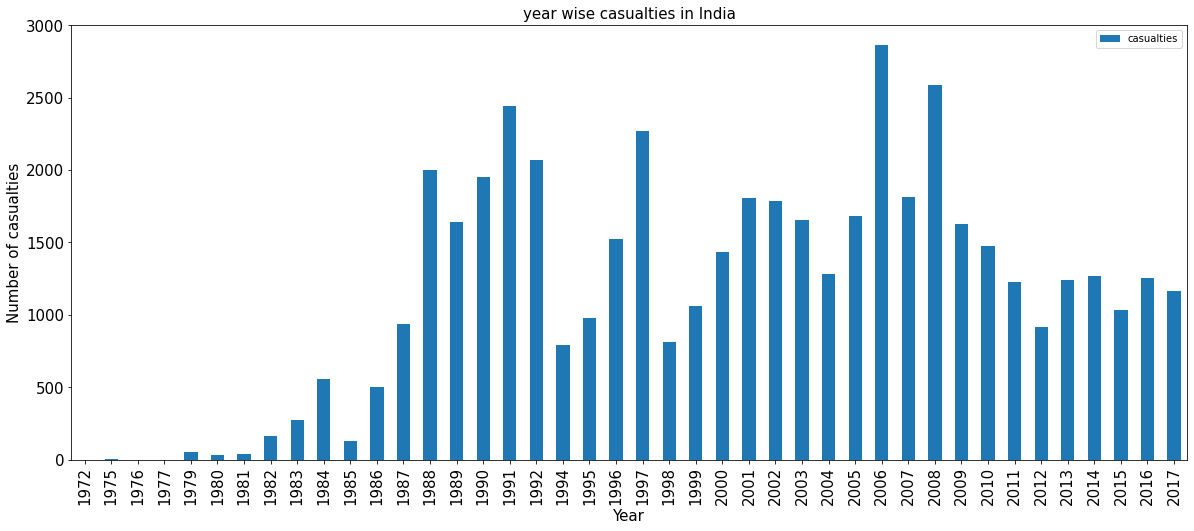

In [125]:
yc.plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("year wise casualties in India", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of casualties", fontsize=15)

## **City wise Attacks and Damages**

1. **city wise attacks**

In [142]:
ca = ind_df['city'].value_counts().drop('Unknown')
ca.head(10)

Srinagar     658
Imphal       426
New Delhi    157
Amritsar     138
Sopore       102
Name: city, dtype: int64

Text(0, 0.5, 'Number of Attacks')

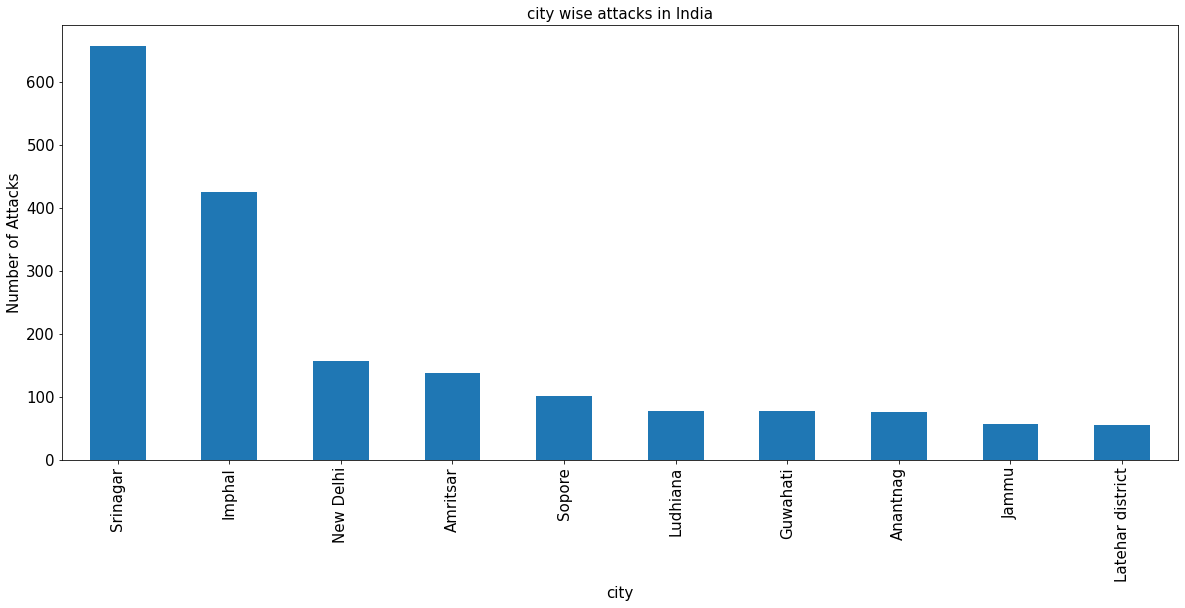

In [143]:
ca.head(10).plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("city wise attacks in India", fontsize=15)
plt.xlabel("city", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)

2. **City wise killed**

In [145]:
ck = ind_df[['city', 'killed']].groupby('city').sum().drop('Unknown').sort_values('killed', ascending=False)
ck.head(10)

,killed
city,
Srinagar,769.0
Mumbai,474.0
New Delhi,378.0
Amritsar,376.0
Jammu,267.0
Dantewada district,213.0
Chandigarh,192.0
Ludhiana,165.0
Guwahati,159.0


Text(0, 0.5, 'Number of people killed')

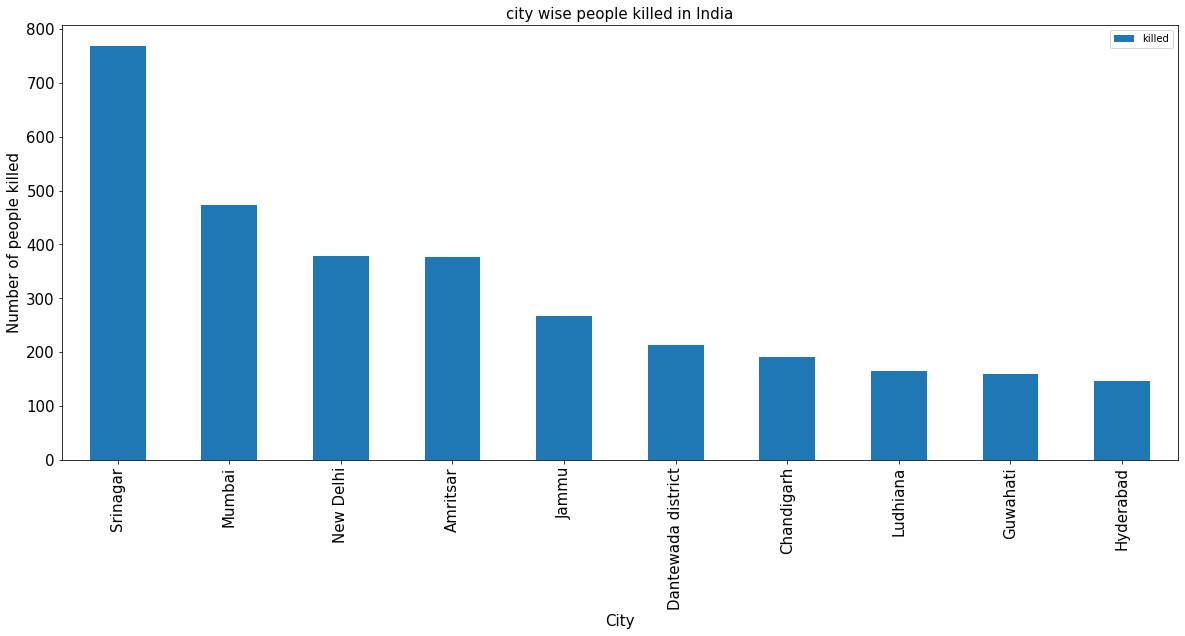

In [146]:
ck.head(10).plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("city wise people killed in India", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of people killed", fontsize=15)

2. **city wise injured**

In [152]:
cw = ind_df[['city', 'wounded']].groupby('city').sum().drop('Unknown').sort_values('wounded', ascending=False)
cw.head(10)

,wounded
city,
Srinagar,2365.0
New Delhi,1717.0
Mumbai,1542.0
Jammu,852.0
Guwahati,663.0
Imphal,468.0
Anantnag,404.0
Amritsar,392.0
Hyderabad,391.0


Text(0, 0.5, 'Number of people injured')

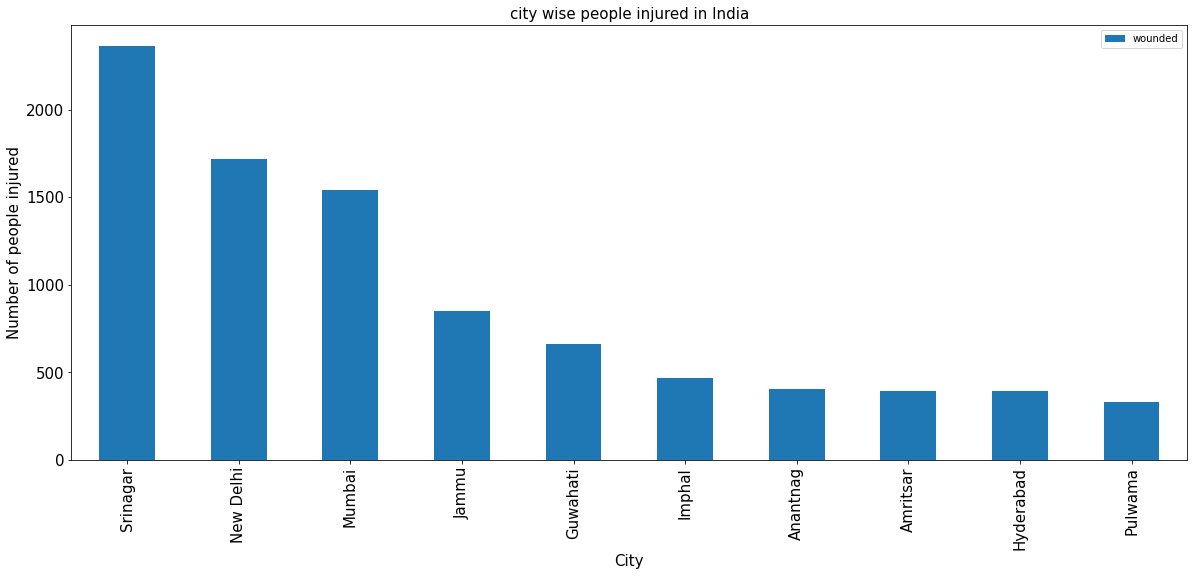

In [153]:
cw.head(10).plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("city wise people injured in India", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of people injured", fontsize=15)

2. **city wise casualties**

In [154]:
cc = ind_df[['city', 'casualties']].groupby('city').sum().drop('Unknown').sort_values('casualties', ascending=False)
cc.head(10)

,casualties
city,
Srinagar,3134.0
New Delhi,2095.0
Mumbai,2016.0
Jammu,1119.0
Guwahati,822.0
Amritsar,768.0
Imphal,603.0
Hyderabad,538.0
Anantnag,506.0


Text(0, 0.5, 'Number of casualties')

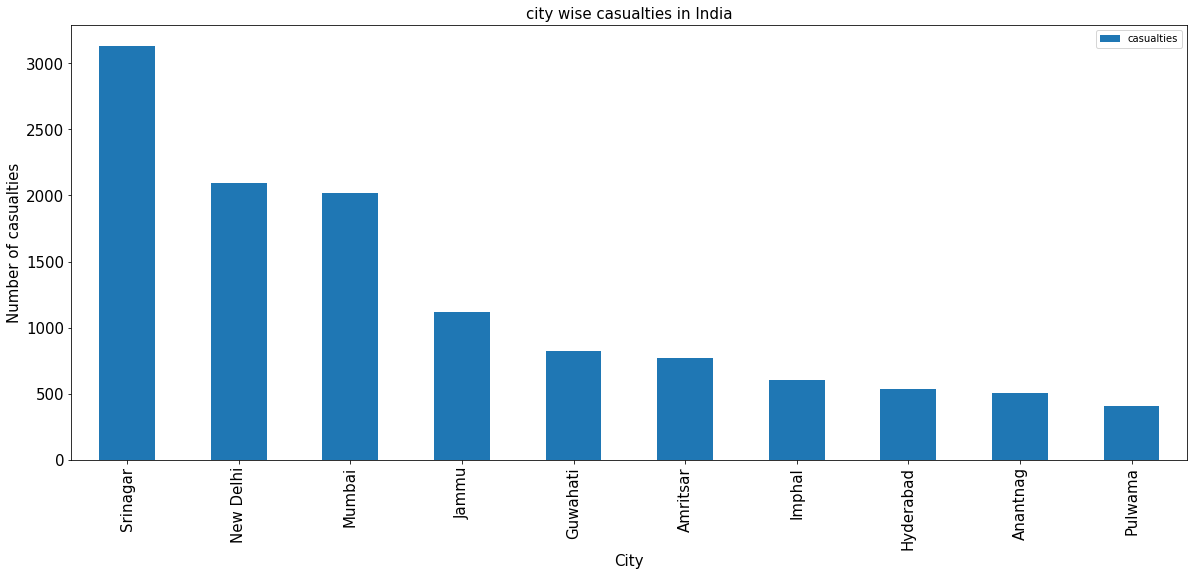

In [155]:
cc.head(10).plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("city wise casualties in India", fontsize=15)
plt.xlabel("City", fontsize=15)
plt.ylabel("Number of casualties", fontsize=15)

4. **State wise attacks**

In [160]:
sa = ind_df['province/state'].value_counts()
sa.head()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Name: province/state, dtype: int64

Text(0, 0.5, 'Number of Attacks')

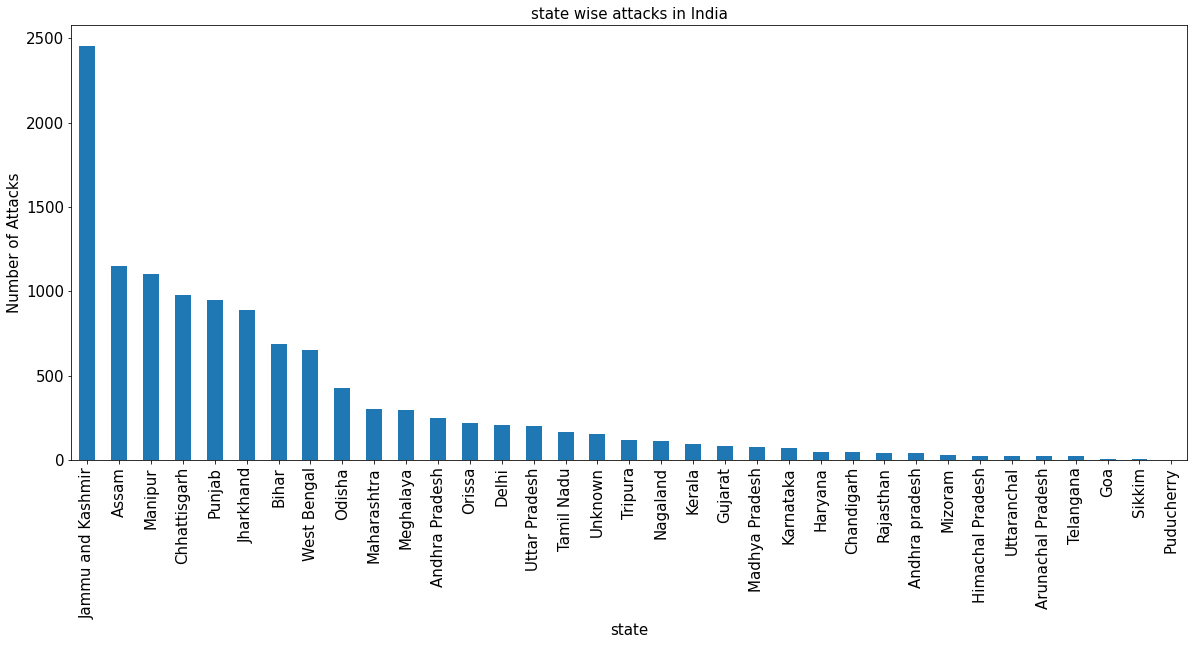

In [162]:
sa.plot(kind="bar",figsize=(20,8), fontsize=15)
plt.title("state wise attacks in India", fontsize=15)
plt.xlabel("state", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)

## **Terrorist Group + State wise attack**

1. **total attack**

In [172]:
gsa=ind_df[["terrorist_group","province/state"]].value_counts().drop("Unknown")
gsa.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


terrorist_group                                 province/state   
Maoists                                         Chhattisgarh         577
Communist Party of India - Maoist (CPI-Maoist)  Jharkhand            456
Sikh Extremists                                 Punjab               453
United Liberation Front of Assam (ULFA)         Assam                338
Communist Party of India - Maoist (CPI-Maoist)  Bihar                324
                                                Chhattisgarh         310
                                                West Bengal          277
Maoists                                         Odisha               228
                                                Jharkhand            222
Hizbul Mujahideen (HM)                          Jammu and Kashmir    193
dtype: int64

Text(0.5, 0, 'Number of Attacks')

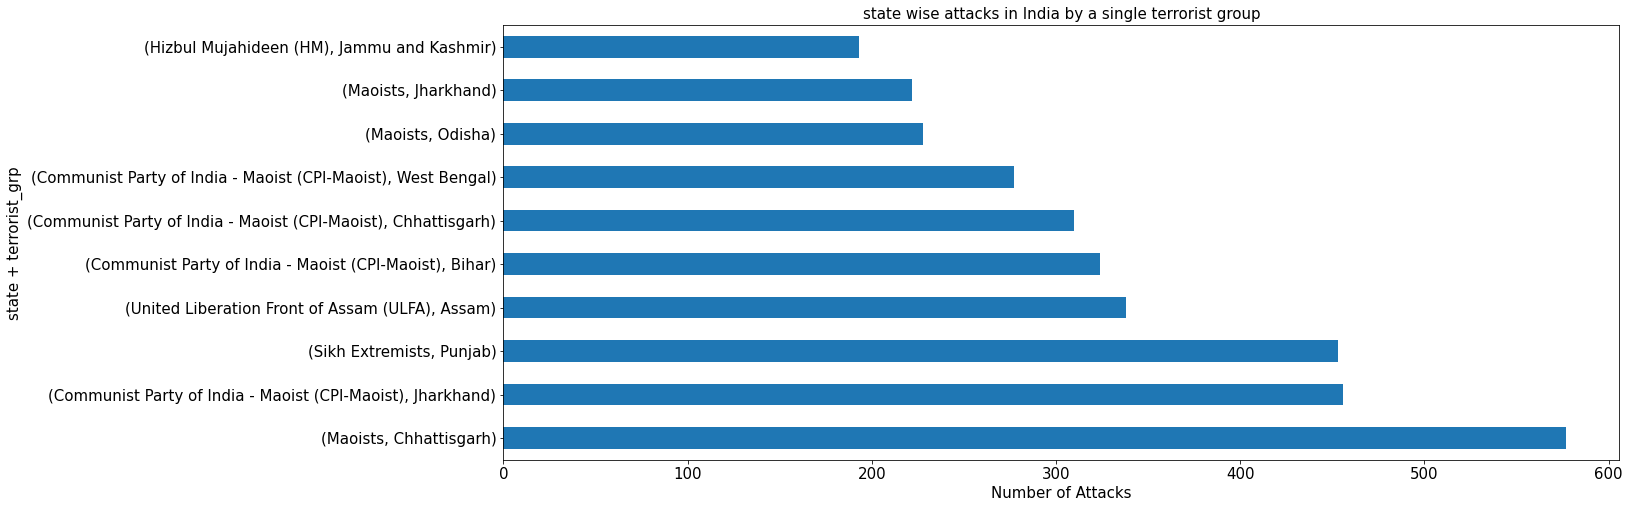

In [175]:
gsa.head(10).plot(kind="barh",figsize=(20,8), fontsize=15)
plt.title("state wise attacks in India by a single terrorist group", fontsize=15)
plt.ylabel("state + terrorist_grp", fontsize=15)
plt.xlabel("Number of Attacks", fontsize=15)

2. **casualties**

In [177]:
gsc=ind_df[["terrorist_group","province/state","casualties"]].groupby(["terrorist_group","province/state"],axis=0).sum().sort_values(by="casualties",ascending=False).drop("Unknown").head(10)
gsc

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


casualties
terrorist_group                                province/state               
United Liberation Front of Assam (ULFA)        Assam                  2562.0
Sikh Extremists                                Punjab                 2528.0
Lashkar-e-Taiba (LeT)                          Jammu and Kashmir      1471.0
Communist Party of India - Maoist (CPI-Maoist) Chhattisgarh           1400.0
Hizbul Mujahideen (HM)                         Jammu and Kashmir      1112.0
Lashkar-e-Taiba (LeT)                          Maharashtra            1005.0
National Democratic Front of Bodoland (NDFB)   Assam                   992.0
Communist Party of India - Maoist (CPI-Maoist) Jharkhand               805.0
                                               West Bengal             744.0
Maoists                                        Chhattisgarh            666.0

Text(0.5, 0, 'Number of casualties')

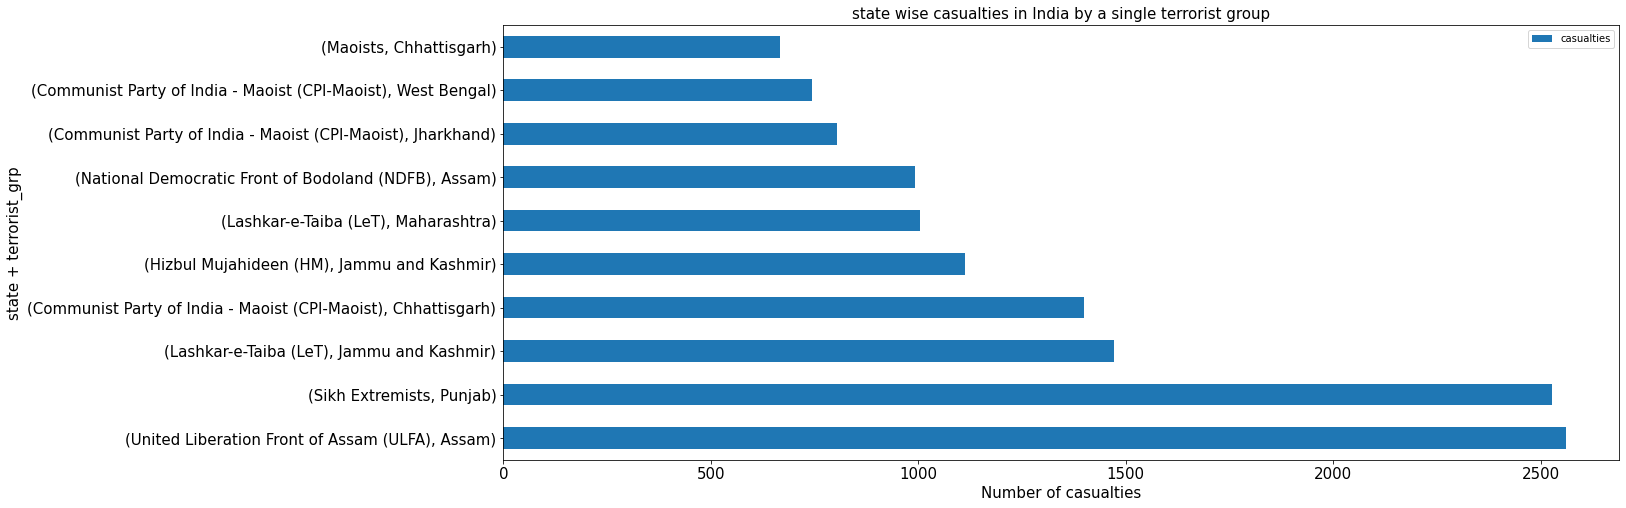

In [179]:
gsc.head(10).plot(kind="barh",figsize=(20,8), fontsize=15)
plt.title("state wise casualties in India by a single terrorist group", fontsize=15)
plt.ylabel("state + terrorist_grp", fontsize=15)
plt.xlabel("Number of casualties", fontsize=15)

4 . **Total casualties in India by Terrorist Attacks from 1970 to 2017**

In [180]:
casualty=ind_df.loc[:,"casualties"].sum()
print("Total number of Casualties in India by Terrorist Attacks from 1970 to 2017:\n", casualty)

Total number of Casualties in India by Terrorist Attacks from 1970 to 2017:
 48321.0


4 . **Total people killed in India by Terrorist Attacks from 1970 to 2017**

In [181]:
killed=ind_df.loc[:,"killed"].sum()
print("Total number of people killed in India by Terrorist Attacks from 1970 to 2017:\n", killed)

Total number of people killed in India by Terrorist Attacks from 1970 to 2017:
 19341.0


4 . **Total people injuered in India by Terrorist Attacks from 1970 to 2017**

In [182]:
injured=ind_df.loc[:,"wounded"].sum()
print("Total number of People injured in India by Terrorist Attacks from 1970 to 2017:\n", injured)

Total number of People injured in India by Terrorist Attacks from 1970 to 2017:
 28980.0
